In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/matches.csv
/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv


In [2]:
!pip install summarytools
!pip install skimpy

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is i

**importing libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")
from summarytools import dfSummary
from skimpy import skim

**loading datasets**

In [4]:
def load_datasets1(df):
    deliveries=pd.read_csv(df)
    return deliveries
df1=load_datasets1("/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv")
    

In [5]:
def load_datasets(df):
    matches=pd.read_csv(df)
    return matches
df2=load_datasets("/kaggle/input/ipl-complete-dataset-20082020/matches.csv")

**EDA**

**top five in df1**

In [6]:
def head1():
    print(df1.head())
head1()

   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   

   ball       batter   bowler  non_striker  batsman_runs  extra_runs  \
0     1   SC Ganguly  P Kumar  BB McCullum             0           1   
1     2  BB McCullum  P Kumar   SC Ganguly             0           0   
2     3  BB McCullum  P Kumar   SC Ganguly             0           1   
3     4  BB McCullum  P Kumar   SC Ganguly             0           0   
4     5  BB McCullum  P Kumar   SC Ganguly             0           0   

   total_runs extras_type  is_wicket player_dismissed dismissal_kind fielder  
0

**top five in df2**

In [7]:
def head2():
    print(df2.head())
    
head2()

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

**shape in df1**

In [8]:
def shape1():
    print(df1.shape)
shape1()

(260920, 17)


**shape of df2**

In [9]:
def shape2():
    print(df2.shape)
shape2()

(1095, 20)


**columns in df1**

In [10]:
def columns1():
    print(df1.columns)
columns1()

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


**columns of df2**

In [11]:
def columns2():
    print(df2.columns)
columns2()

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')


**df1 information**

In [12]:
def info1():
    df1.info()
info1()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

**df2 information**

In [13]:
def info2():
    df2.info()
info2()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

**df1 description**

In [14]:
def desc1():
    print(df1.describe())
desc1()

           match_id         inning           over           ball  \
count  2.609200e+05  260920.000000  260920.000000  260920.000000   
mean   9.070665e+05       1.483531       9.197677       3.624486   
std    3.679913e+05       0.502643       5.683484       1.814920   
min    3.359820e+05       1.000000       0.000000       1.000000   
25%    5.483340e+05       1.000000       4.000000       2.000000   
50%    9.809670e+05       1.000000       9.000000       4.000000   
75%    1.254066e+06       2.000000      14.000000       5.000000   
max    1.426312e+06       6.000000      19.000000      11.000000   

        batsman_runs     extra_runs     total_runs      is_wicket  
count  260920.000000  260920.000000  260920.000000  260920.000000  
mean        1.265001       0.067806       1.332807       0.049632  
std         1.639298       0.343265       1.626416       0.217184  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000

**df2 description**

In [15]:
def desc2():
    print(df2.describe())
desc2()

                 id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000


**checking null values(df1)**

In [16]:
def null1():
    print(df1.isna().sum())
null1()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


**checking null values(df2)**

In [17]:
def null2():
    print(df2.isna().sum())
null2()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


**count non null values in df1**

In [18]:
def count1():
    print(df1.count())
count1()

match_id            260920
inning              260920
batting_team        260920
bowling_team        260920
over                260920
ball                260920
batter              260920
bowler              260920
non_striker         260920
batsman_runs        260920
extra_runs          260920
total_runs          260920
extras_type          14125
is_wicket           260920
player_dismissed     12950
dismissal_kind       12950
fielder               9354
dtype: int64


**count non null values**

In [19]:
def count2():
    print(df2.count())
count2()

id                 1095
season             1095
city               1044
date               1095
match_type         1095
player_of_match    1090
venue              1095
team1              1095
team2              1095
toss_winner        1095
toss_decision      1095
winner             1090
result             1095
result_margin      1076
target_runs        1092
target_overs       1092
super_over         1095
method               21
umpire1            1095
umpire2            1095
dtype: int64


**unique values in df1**

In [20]:
def unique1():
    for i in df1.columns:
        print(i)
        print("-"*20)
        print(df1[i].unique())
unique1()

match_id
--------------------
[ 335982  335983  335984 ... 1426310 1426311 1426312]
inning
--------------------
[1 2 3 4 5 6]
batting_team
--------------------
['Kolkata Knight Riders' 'Royal Challengers Bangalore'
 'Chennai Super Kings' 'Kings XI Punjab' 'Rajasthan Royals'
 'Delhi Daredevils' 'Mumbai Indians' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Rising Pune Supergiant'
 'Delhi Capitals' 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']
bowling_team
--------------------
['Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Kings XI Punjab'
 'Chennai Super Kings' 'Delhi Daredevils' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Royal Challengers Bengaluru

**unique values in df2**

In [21]:
def unique2():
    for i in df2.columns:
        print(i)
        print("-"*20)
        print(df2[i].unique())
unique2()

id
--------------------
[ 335982  335983  335984 ... 1426310 1426311 1426312]
season
--------------------
['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']
city
--------------------
['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali']
date
--------------------
['2008-04-18' '2008-04-19' '2008-04-20' '2008-04-21' '2008-04-22'
 '2008-04-23' '2008-04-24' '2008-04-25' '2008-04-26' '2008-04-27'
 '2008-04-28' '2008-04-29' '2008-04-30' '2008-05-01' '2008-05-02'
 '2008-05-03' '2008-05-04' '2008-05-05' '2008-05-06' '2008-05-07'
 '2008-05-08' '2008-05-09' '2008-05-10' '

**nunique values in df1**

In [22]:
def no_unique1():
    print(df1.nunique())
no_unique1()

match_id            1095
inning                 6
batting_team          19
bowling_team          19
over                  20
ball                  11
batter               673
bowler               530
non_striker          663
batsman_runs           7
extra_runs             7
total_runs             8
extras_type            5
is_wicket              2
player_dismissed     629
dismissal_kind        10
fielder              607
dtype: int64


**nunique of df2**

In [23]:
def no_unique2():
    print(df2.nunique())
no_unique2()

id                 1095
season               17
city                 36
date                823
match_type            8
player_of_match     291
venue                58
team1                19
team2                19
toss_winner          19
toss_decision         2
winner               19
result                4
result_margin        98
target_runs         170
target_overs         15
super_over            2
method                1
umpire1              62
umpire2              62
dtype: int64


**types of columns in df1**

In [24]:
def dtypes1():
    print(df1.dtypes)
dtypes1()

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object


**types of columns in df2**

In [25]:
def dtypes2():
    print(df2.dtypes)
dtypes2()

id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              object
umpire1             object
umpire2             object
dtype: object


**dataframe summary(df1)**

In [26]:
dfSummary(df1)

**dataframe summary(df2)**

In [27]:
dfSummary(df2)

**skim(df1)**

In [28]:
def skim1():
    skim(df1)
skim1()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 260920 │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 17     │ │ int64       │ 8     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ match_id       │   0 │     0 │   907100 │  368000 │  336000 │ 548300 │ 981000 │ 1254000 │ 1426000 │ ▇▅▃▂▇▇ │  │
│ │ inning         │   0 │     0 │    1.484 │  0.5026 │       1 │      1 │      1 │       2 │       6 │   ▇▇   │  │
│ │ over           │   0 │     0 │    9.198 │   5.683 │       0 │      4 │      9 │      14 │      19 │ ▇▆▆▆▆▇ │  │
│ │ ball           │   0 │     0 │    3.624 │   1.815 │       1 │      2 │      4 │       5 │      11 │  ▇▇▃▅  │  │
│ │ batsman_runs   │   0 │     0 │    1.265 │   1.639 │       0 │      0 │      1 │       1 │       6 │ ▇▇▁ ▂▁ │  │
│ │ extra_runs     │   0 │     0 │  0.06781 │  0.3433 │       0 │      0 │      0 │       0 │       7 │   ▇    │  │
│ │ total_runs     │   0 │     0 │    1.333 │   1.626 │       0 │      0 │      1 │       1 │       7 │ ▇▁ ▁ ▁ │  │
│ │ is_wicket      │   0 │     0 │  0.04963 │  0.2172 │       0 │      0 │      0 │       0 │       1 │   ▇    │  │
│ └────────────────┴─────┴───────┴──────────┴─────────┴─────────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA           ┃ NA %       ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ batting_team                  │            0 │          0 │                      2.5 │              643136 │  │
│ │ bowling_team                  │            0 │          0 │                      2.5 │              643104 │  │
│ │ batter                        │            0 │          0 │                      2.1 │              536709 │  │
│ │ bowler                        │            0 │          0 │                        2 │              530473 │  │
│ │ non_striker                   │            0 │          0 │                      2.1 │              537087 │  │
│ │ extras_type                   │       246795 │      94.59 │                    0.054 │               14125 │  │
│ │ player_dismissed              │       247970 │      95.04 │                      0.1 │               26595 │  │
│ │ dismissal_kind                │       247970 │      95.04 │                    0.057 │               14837 │  │
│ │ fielder                       │       251566 │      96.41 │                    0.074 │               19235 │  │
│ └───────────────────────────────┴──────────────┴──────

**skim(df2)**

In [29]:
def skim2():
    skim(df2)
skim2()

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1095   │ │ string      │ 16    │                                                          │
│ │ Number of columns │ 20     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ id              │   0 │     0 │  904800 │  367700 │  336000 │ 548300 │ 981000 │ 1254000 │ 1426000 │ ▇▅▃▂▇▇ │  │
│ │ result_margin   │  19 │  1.74 │   17.26 │   21.79 │       1 │      6 │      8 │      20 │     146 │   ▇▁   │  │
│ │ target_runs     │   3 │  0.27 │   165.7 │   33.43 │      43 │    146 │    166 │     187 │     288 │  ▁▇▇▂  │  │
│ │ target_overs    │   3 │  0.27 │   19.76 │   1.581 │       5 │     20 │     20 │      20 │      20 │      ▇ │  │
│ └─────────────────┴─────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA        ┃ NA %        ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ season                        │         0 │           0 │                         1 │                 1095 │  │
│ │ city                          │        51 │        4.66 │                         1 │                 1107 │  │
│ │ date                          │         0 │           0 │                         1 │                 1095 │  │
│ │ match_type                    │         0 │           0 │                         1 │                 1134 │  │
│ │ player_of_match               │         5 │        0.46 │                         2 │                 2234 │  │
│ │ venue                         │         0 │           0 │                       3.7 │                 4011 │  │
│ │ team1                         │         0 │           0 │                       2.5 │                 2719 │  │
│ │ team2                         │         0 │           0 │                       2.5 │                 2683 │  │
│ │ toss_winner                   │         0 │           0 │                       2.4 │                 2680 │  │
│ │ toss_decision                 │         0 │           0 │                         1 │                 1095 │  │
│ │ winner                        │         5 │        0.46 │                       2.5 │                 2705 │  │
│ │ result                        │         0 │           0 │                         1 │                 1100 │  │
│ │ super_over                    │         0 │         

**replace**

In [30]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals','Gujarat Titans',
    'Lucknow Super Giants', 'Royal Challengers Bengaluru','Punjab Kings']
y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC','GT','LSG','RCB','KXIP']

def replace():
    df1.replace(x,y,inplace=True)
    df2.replace(x,y,inplace=True)
replace()

In [31]:
def head():
    print(df1.head())
    print(df2.head())
head()

   match_id  inning batting_team bowling_team  over  ball       batter  \
0    335982       1          KKR          RCB     0     1   SC Ganguly   
1    335982       1          KKR          RCB     0     2  BB McCullum   
2    335982       1          KKR          RCB     0     3  BB McCullum   
3    335982       1          KKR          RCB     0     4  BB McCullum   
4    335982       1          KKR          RCB     0     5  BB McCullum   

    bowler  non_striker  batsman_runs  extra_runs  total_runs extras_type  \
0  P Kumar  BB McCullum             0           1           1     legbyes   
1  P Kumar   SC Ganguly             0           0           0         NaN   
2  P Kumar   SC Ganguly             0           1           1       wides   
3  P Kumar   SC Ganguly             0           0           0         NaN   
4  P Kumar   SC Ganguly             0           0           0         NaN   

   is_wicket player_dismissed dismissal_kind fielder  
0          0              NaN        

**decribe**

In [32]:
def desc():
    print("df1 description")
    print()
    print(df1.describe(include="all"))
    print()
    print("df2 description")
    print()
    print(df2.describe(include="all"))
desc()

df1 description

            match_id         inning batting_team bowling_team           over  \
count   2.609200e+05  260920.000000       260920       260920  260920.000000   
unique           NaN            NaN           14           14            NaN   
top              NaN            NaN           MI           MI            NaN   
freq             NaN            NaN        31437        31505            NaN   
mean    9.070665e+05       1.483531          NaN          NaN       9.197677   
std     3.679913e+05       0.502643          NaN          NaN       5.683484   
min     3.359820e+05       1.000000          NaN          NaN       0.000000   
25%     5.483340e+05       1.000000          NaN          NaN       4.000000   
50%     9.809670e+05       1.000000          NaN          NaN       9.000000   
75%     1.254066e+06       2.000000          NaN          NaN      14.000000   
max     1.426312e+06       6.000000          NaN          NaN      19.000000   

                 ball 

In [33]:
head1()

   match_id  inning batting_team bowling_team  over  ball       batter  \
0    335982       1          KKR          RCB     0     1   SC Ganguly   
1    335982       1          KKR          RCB     0     2  BB McCullum   
2    335982       1          KKR          RCB     0     3  BB McCullum   
3    335982       1          KKR          RCB     0     4  BB McCullum   
4    335982       1          KKR          RCB     0     5  BB McCullum   

    bowler  non_striker  batsman_runs  extra_runs  total_runs extras_type  \
0  P Kumar  BB McCullum             0           1           1     legbyes   
1  P Kumar   SC Ganguly             0           0           0         NaN   
2  P Kumar   SC Ganguly             0           1           1       wides   
3  P Kumar   SC Ganguly             0           0           0         NaN   
4  P Kumar   SC Ganguly             0           0           0         NaN   

   is_wicket player_dismissed dismissal_kind fielder  
0          0              NaN        

In [34]:
head2()

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.

**modify column**

In [35]:
def modify():
    df2["season"]=df2["date"].str[:4].astype("int")
modify()

In [36]:
head2()

       id  season        city        date match_type player_of_match  \
0  335982    2008   Bangalore  2008-04-18     League     BB McCullum   
1  335983    2008  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984    2008       Delhi  2008-04-19     League     MF Maharoof   
3  335985    2008      Mumbai  2008-04-20     League      MV Boucher   
4  335986    2008     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0     

In [37]:
null1()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [38]:
null2()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [39]:
def modify1():
    df2["city"]=df2["city"].fillna("unknown")
modify1()

In [40]:
null2()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64


In [41]:

def modify2():
    df2["player_of_match"]=df2["player_of_match"].fillna("not available")
    
modify2()

In [42]:
def modify3():
    df2.dropna(subset="winner",inplace=True)
modify3()

In [43]:
null2()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        14
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64


In [44]:
def modify2():
    df2["result_margin"]=df2["result_margin"].fillna(df2["result_margin"].mean())
modify2()

In [45]:
null2()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64


In [46]:
null2()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           0
target_overs          0
super_over            0
method             1069
umpire1               0
umpire2               0
dtype: int64


**coverting obj column to datetime colummn**

In [47]:
head1()

   match_id  inning batting_team bowling_team  over  ball       batter  \
0    335982       1          KKR          RCB     0     1   SC Ganguly   
1    335982       1          KKR          RCB     0     2  BB McCullum   
2    335982       1          KKR          RCB     0     3  BB McCullum   
3    335982       1          KKR          RCB     0     4  BB McCullum   
4    335982       1          KKR          RCB     0     5  BB McCullum   

    bowler  non_striker  batsman_runs  extra_runs  total_runs extras_type  \
0  P Kumar  BB McCullum             0           1           1     legbyes   
1  P Kumar   SC Ganguly             0           0           0         NaN   
2  P Kumar   SC Ganguly             0           1           1       wides   
3  P Kumar   SC Ganguly             0           0           0         NaN   
4  P Kumar   SC Ganguly             0           0           0         NaN   

   is_wicket player_dismissed dismissal_kind fielder  
0          0              NaN        

In [48]:
head2()

       id  season        city        date match_type player_of_match  \
0  335982    2008   Bangalore  2008-04-18     League     BB McCullum   
1  335983    2008  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984    2008       Delhi  2008-04-19     League     MF Maharoof   
3  335985    2008      Mumbai  2008-04-20     League      MV Boucher   
4  335986    2008     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0     

In [49]:
def date():
    df2["date"]=df2["date"].astype("datetime64[ns]")
date()

In [50]:
dtypes2()

id                          int64
season                      int64
city                       object
date               datetime64[ns]
match_type                 object
player_of_match            object
venue                      object
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
target_runs               float64
target_overs              float64
super_over                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object


In [51]:
null1()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [52]:
head1()

   match_id  inning batting_team bowling_team  over  ball       batter  \
0    335982       1          KKR          RCB     0     1   SC Ganguly   
1    335982       1          KKR          RCB     0     2  BB McCullum   
2    335982       1          KKR          RCB     0     3  BB McCullum   
3    335982       1          KKR          RCB     0     4  BB McCullum   
4    335982       1          KKR          RCB     0     5  BB McCullum   

    bowler  non_striker  batsman_runs  extra_runs  total_runs extras_type  \
0  P Kumar  BB McCullum             0           1           1     legbyes   
1  P Kumar   SC Ganguly             0           0           0         NaN   
2  P Kumar   SC Ganguly             0           1           1       wides   
3  P Kumar   SC Ganguly             0           0           0         NaN   
4  P Kumar   SC Ganguly             0           0           0         NaN   

   is_wicket player_dismissed dismissal_kind fielder  
0          0              NaN        

In [53]:
def col_null():
    for i in df1.columns:
        if df1[i].isna().sum() >=10:
            print(i)
            print("_"*20)
            print(df1[i].unique())
col_null()

extras_type
____________________
['legbyes' nan 'wides' 'byes' 'noballs' 'penalty']
player_dismissed
____________________
[nan 'SC Ganguly' 'RT Ponting' 'DJ Hussey' 'R Dravid' 'V Kohli'
 'JH Kallis' 'W Jaffer' 'MV Boucher' 'B Akhil' 'CL White' 'AA Noffke'
 'Z Khan' 'SB Joshi' 'PA Patel' 'ML Hayden' 'MS Dhoni' 'SK Raina'
 'JDP Oram' 'K Goel' 'JR Hopes' 'Yuvraj Singh' 'KC Sangakkara' 'T Kohli'
 'YK Pathan' 'SR Watson' 'DS Lehmann' 'M Kaif' 'M Rawat' 'RA Jadeja'
 'SK Warne' 'V Sehwag' 'L Ronchi' 'DJ Thornely' 'ST Jayasuriya' 'PR Shah'
 'RV Uthappa' 'AM Nayar' 'SM Pollock' 'S Chanderpaul' 'LRPL Taylor'
 'Y Venugopal Rao' 'VVS Laxman' 'AC Gilchrist' 'RG Sharma' 'SB Styris'
 'AS Yadav' 'A Symonds' 'WPUJC Vaas' 'SB Bangar' 'PP Ojha' 'BB McCullum'
 'WP Saha' 'Mohammad Hafeez' 'DPMD Jayawardene' 'IK Pathan' 'B Lee'
 'S Sohal' 'Kamran Akmal' 'Shahid Afridi' 'G Gambhir' 'MEK Hussey'
 'DJ Bravo' 'MA Khote' 'Harbhajan Singh' 'GC Smith' 'D Salunkhe'
 'RR Sarwan' 'PP Chawla' 'S Sreesanth' 'VRV Singh'

**duplicated**

In [54]:
def dupli1():
    print(df1[df1.duplicated()])
dupli1()

Empty DataFrame
Columns: [match_id, inning, batting_team, bowling_team, over, ball, batter, bowler, non_striker, batsman_runs, extra_runs, total_runs, extras_type, is_wicket, player_dismissed, dismissal_kind, fielder]
Index: []


In [55]:
def dupli2():
    print(df2[df2.duplicated()])
dupli1()

Empty DataFrame
Columns: [match_id, inning, batting_team, bowling_team, over, ball, batter, bowler, non_striker, batsman_runs, extra_runs, total_runs, extras_type, is_wicket, player_dismissed, dismissal_kind, fielder]
Index: []


In [56]:
def dup_sum():
    print(df1.duplicated().sum())
    print(df2.duplicated().sum())
dup_sum()

0
0


In [57]:
head2()

       id  season        city       date match_type player_of_match  \
0  335982    2008   Bangalore 2008-04-18     League     BB McCullum   
1  335983    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2  335984    2008       Delhi 2008-04-19     League     MF Maharoof   
3  335985    2008      Mumbai 2008-04-20     League      MV Boucher   
4  335986    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223

**single column unique values and value counts**

In [58]:
def sin_col():
    print(df2["method"].unique())
    print()
    print(df2["method"].value_counts())
sin_col()

[nan 'D/L']

method
D/L    21
Name: count, dtype: int64


**removing unwanted columns**

In [59]:
def unwanted_columns():
    df2.drop(["method","id"],axis='columns',inplace=True)
unwanted_columns()

In [60]:
head2()

   season        city       date match_type player_of_match  \
0    2008   Bangalore 2008-04-18     League     BB McCullum   
1    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2    2008       Delhi 2008-04-19     League     MF Maharoof   
3    2008      Mumbai 2008-04-20     League      MV Boucher   
4    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223.0          20.0   
1           bat    CSK     r

**super over matches**

In [61]:
def super_matches():
    print(df2.query("super_over == 'Y'"))
super_matches()

     season       city       date match_type player_of_match  \
66     2009  Cape Town 2009-04-23     League       YK Pathan   
130    2010    Chennai 2010-03-21     League        J Theron   
328    2013  Hyderabad 2013-04-07     League       GH Vihari   
342    2013  Bangalore 2013-04-16     League         V Kohli   
416    2014  Abu Dhabi 2014-04-29     League     JP Faulkner   
475    2015  Ahmedabad 2015-04-21     League        SE Marsh   
610    2017     Rajkot 2017-04-29     League       KH Pandya   
705    2019      Delhi 2019-03-30     League         PP Shaw   
746    2019     Mumbai 2019-05-02     League       JJ Bumrah   
757    2020    unknown 2020-09-20     League      MP Stoinis   
765    2020    unknown 2020-09-28     League  AB de Villiers   
790    2020  Abu Dhabi 2020-10-18     League     LH Ferguson   
791    2020    unknown 2020-10-18     League        KL Rahul   
835    2021    Chennai 2021-04-25     League         PP Shaw   

                                       

In [62]:
head1()

   match_id  inning batting_team bowling_team  over  ball       batter  \
0    335982       1          KKR          RCB     0     1   SC Ganguly   
1    335982       1          KKR          RCB     0     2  BB McCullum   
2    335982       1          KKR          RCB     0     3  BB McCullum   
3    335982       1          KKR          RCB     0     4  BB McCullum   
4    335982       1          KKR          RCB     0     5  BB McCullum   

    bowler  non_striker  batsman_runs  extra_runs  total_runs extras_type  \
0  P Kumar  BB McCullum             0           1           1     legbyes   
1  P Kumar   SC Ganguly             0           0           0         NaN   
2  P Kumar   SC Ganguly             0           1           1       wides   
3  P Kumar   SC Ganguly             0           0           0         NaN   
4  P Kumar   SC Ganguly             0           0           0         NaN   

   is_wicket player_dismissed dismissal_kind fielder  
0          0              NaN        

In [63]:
dtypes1()

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs           int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object


In [64]:
dtypes2()

season                      int64
city                       object
date               datetime64[ns]
match_type                 object
player_of_match            object
venue                      object
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
target_runs               float64
target_overs              float64
super_over                 object
umpire1                    object
umpire2                    object
dtype: object


**seperating numerical and categorical columns**

In [65]:
def sep_num_cat():
    a=df1.select_dtypes(include="object")
    b=df1.select_dtypes(exclude="object")
    c=df2.select_dtypes(include="object")
    d=df2.select_dtypes(exclude="object")
    
    return a,b,c,d
num1,cat1,num2,cat2=sep_num_cat()


In [66]:
def numerical_columns():
    print("df1 columns")
    print()
    print(num1.columns)
    print()
    print("df2 columns")
    print(num2.columns)
    print()
numerical_columns()
    

df1 columns

Index(['batting_team', 'bowling_team', 'batter', 'bowler', 'non_striker',
       'extras_type', 'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

df2 columns
Index(['city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')



In [67]:
def categorical_columns():
    print("df1 columns")
    print()
    print(cat1.columns)
    print()
    print("df2 columns")
    print(cat2.columns)
    print()
categorical_columns()
    

df1 columns

Index(['match_id', 'inning', 'over', 'ball', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket'],
      dtype='object')

df2 columns
Index(['season', 'date', 'result_margin', 'target_runs', 'target_overs'], dtype='object')



**duplicates**

In [68]:
def duplicates():
    print(df1.duplicated().sum())
    print(df2.duplicated().sum())
duplicates()

0
0


In [69]:

null1()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64


In [70]:
null2()

season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64


In [71]:
shape2()

(1090, 18)


In [72]:
shape1()

(260920, 17)


**data vizualization**

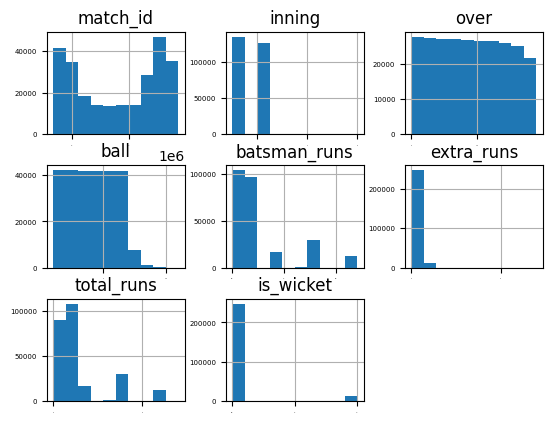

In [73]:
def viz1_df1():
    df1.hist(xlabelsize=1,ylabelsize=5)
    plt.show()
viz1_df1()

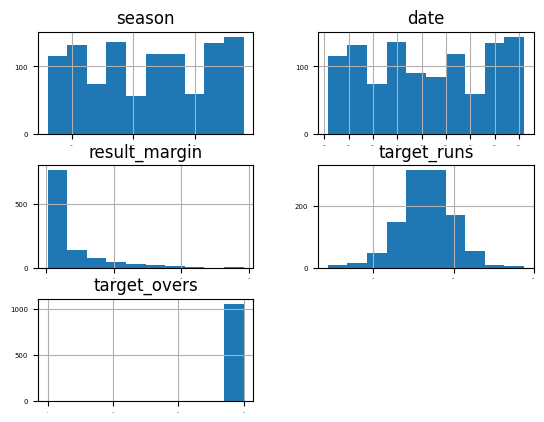

In [74]:
def viz2_df2():
    df2.hist(xlabelsize=1,ylabelsize=5)
    plt.show()
viz2_df2()

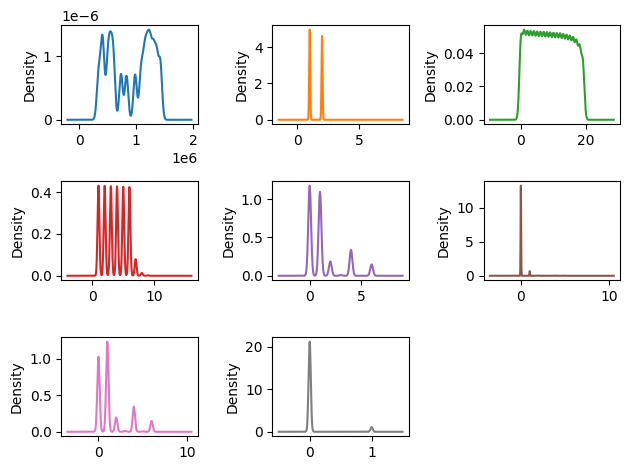

In [75]:
def viz3_df1():
    df1.plot(kind="density",sharex=False,subplots=True,layout=(3,3),legend=False)
    plt.tight_layout()
    plt.show()
viz3_df1()

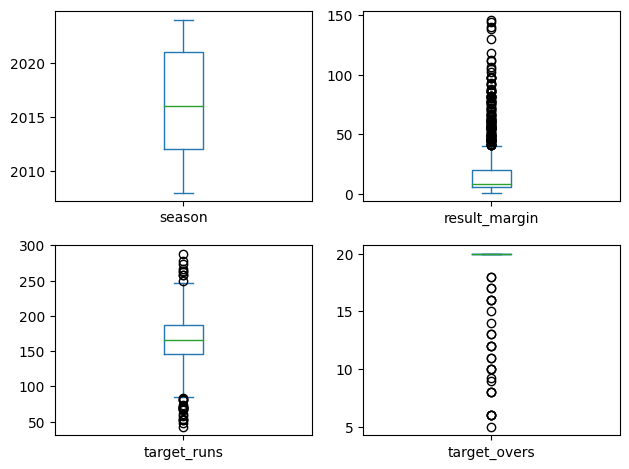

In [76]:
def viz4_df2():
    df2.plot(kind="box",subplots=True,layout=(2,2))
    plt.tight_layout()
    plt.show()
viz4_df2()

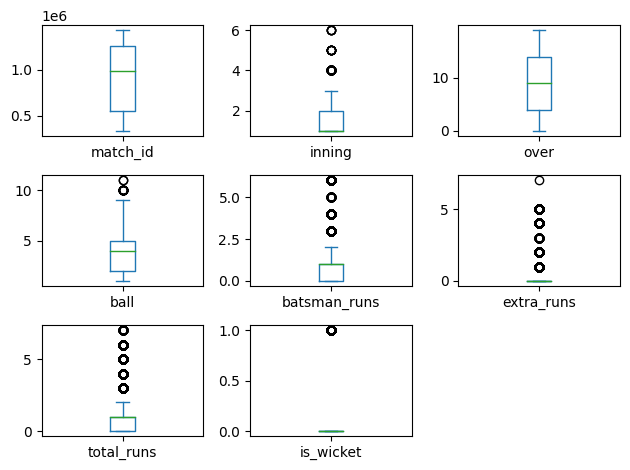

In [77]:
def viz5_df1():
    df1.plot(kind="box",subplots=True,layout=(3,3))
    plt.tight_layout()
    plt.show()
viz5_df1()

In [78]:
def num_cat():
    a=df1.select_dtypes(include="object")
    b=df1.select_dtypes(exclude="object")
    c=df2.select_dtypes(include="object")
    d=df2.select_dtypes(exclude="object")
    return a,b,c,d
cat1,num1,cat2,num2=num_cat()

In [79]:
print(cat1)

       batting_team bowling_team       batter         bowler  non_striker  \
0               KKR          RCB   SC Ganguly        P Kumar  BB McCullum   
1               KKR          RCB  BB McCullum        P Kumar   SC Ganguly   
2               KKR          RCB  BB McCullum        P Kumar   SC Ganguly   
3               KKR          RCB  BB McCullum        P Kumar   SC Ganguly   
4               KKR          RCB  BB McCullum        P Kumar   SC Ganguly   
...             ...          ...          ...            ...          ...   
260915          KKR          SRH      SS Iyer     AK Markram      VR Iyer   
260916          KKR          SRH      VR Iyer     AK Markram      SS Iyer   
260917          KKR          SRH      VR Iyer  Shahbaz Ahmed      SS Iyer   
260918          KKR          SRH      SS Iyer  Shahbaz Ahmed      VR Iyer   
260919          KKR          SRH      VR Iyer  Shahbaz Ahmed      SS Iyer   

       extras_type player_dismissed dismissal_kind fielder  
0          leg

In [80]:
print(cat2)

            city   match_type  player_of_match  \
0      Bangalore       League      BB McCullum   
1     Chandigarh       League       MEK Hussey   
2          Delhi       League      MF Maharoof   
3         Mumbai       League       MV Boucher   
4        Kolkata       League        DJ Hussey   
...          ...          ...              ...   
1090   Hyderabad       League  Abhishek Sharma   
1091   Ahmedabad  Qualifier 1         MA Starc   
1092   Ahmedabad   Eliminator         R Ashwin   
1093     Chennai  Qualifier 2    Shahbaz Ahmed   
1094     Chennai        Final         MA Starc   

                                                  venue team1 team2  \
0                                 M Chinnaswamy Stadium   RCB   KKR   
1            Punjab Cricket Association Stadium, Mohali  KXIP   CSK   
2                                      Feroz Shah Kotla    DC    RR   
3                                      Wankhede Stadium    MI   RCB   
4                                          E

In [81]:
print(num1)

        match_id  inning  over  ball  batsman_runs  extra_runs  total_runs  \
0         335982       1     0     1             0           1           1   
1         335982       1     0     2             0           0           0   
2         335982       1     0     3             0           1           1   
3         335982       1     0     4             0           0           0   
4         335982       1     0     5             0           0           0   
...          ...     ...   ...   ...           ...         ...         ...   
260915   1426312       2     9     5             1           0           1   
260916   1426312       2     9     6             1           0           1   
260917   1426312       2    10     1             1           0           1   
260918   1426312       2    10     2             1           0           1   
260919   1426312       2    10     3             1           0           1   

        is_wicket  
0               0  
1               0  
2  

In [82]:
print(num2)

      season       date  result_margin  target_runs  target_overs
0       2008 2008-04-18          140.0        223.0          20.0
1       2008 2008-04-19           33.0        241.0          20.0
2       2008 2008-04-19            9.0        130.0          20.0
3       2008 2008-04-20            5.0        166.0          20.0
4       2008 2008-04-20            5.0        111.0          20.0
...      ...        ...            ...          ...           ...
1090    2024 2024-05-19            4.0        215.0          20.0
1091    2024 2024-05-21            8.0        160.0          20.0
1092    2024 2024-05-22            4.0        173.0          20.0
1093    2024 2024-05-24           36.0        176.0          20.0
1094    2024 2024-05-26            8.0        114.0          20.0

[1090 rows x 5 columns]


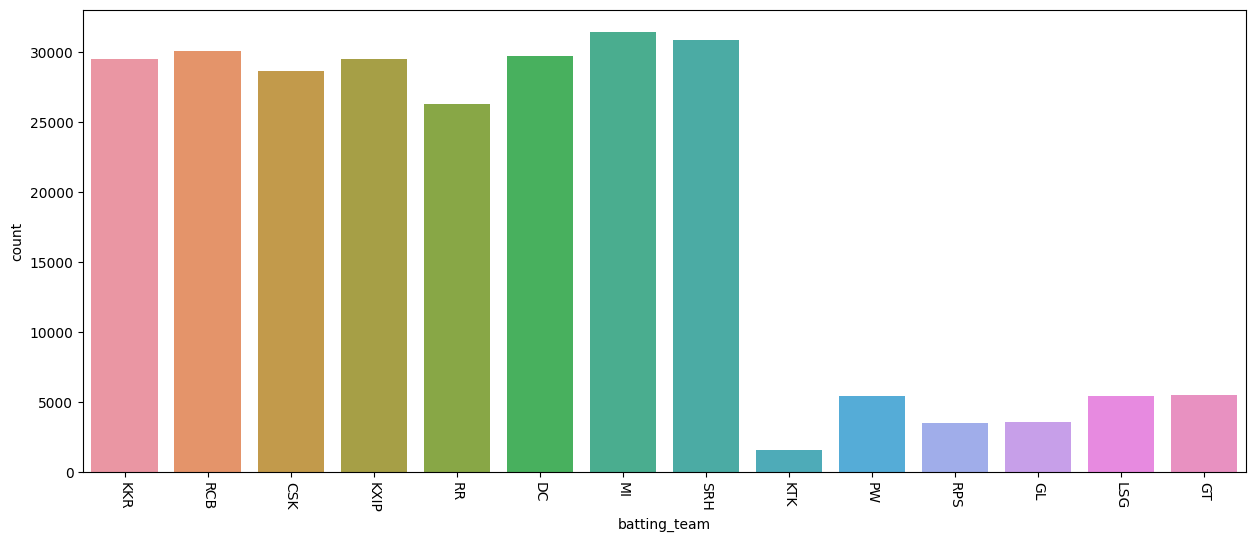

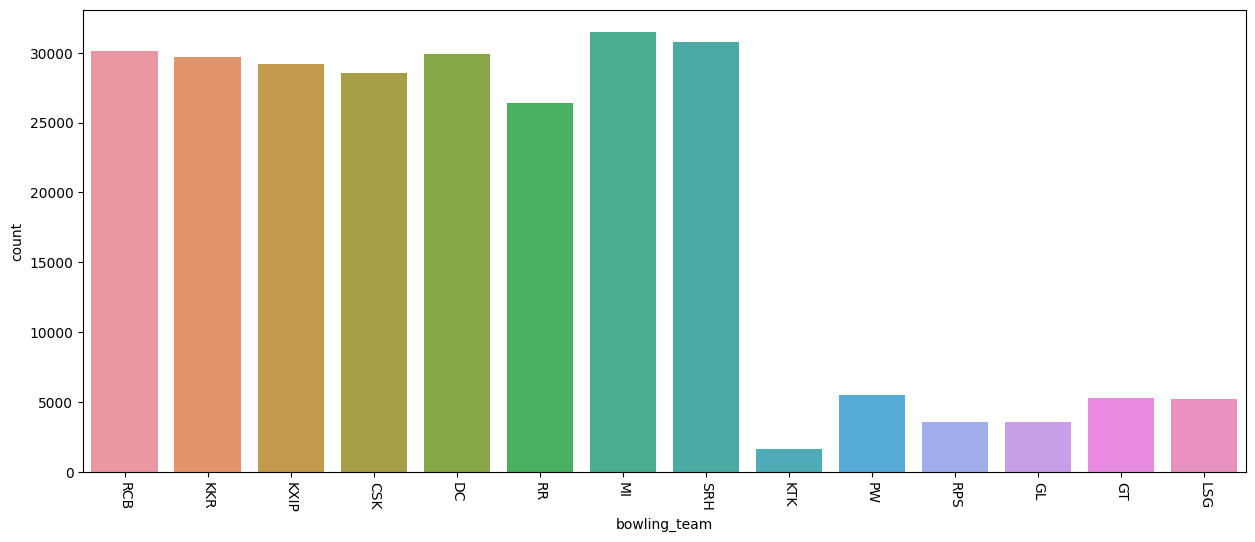

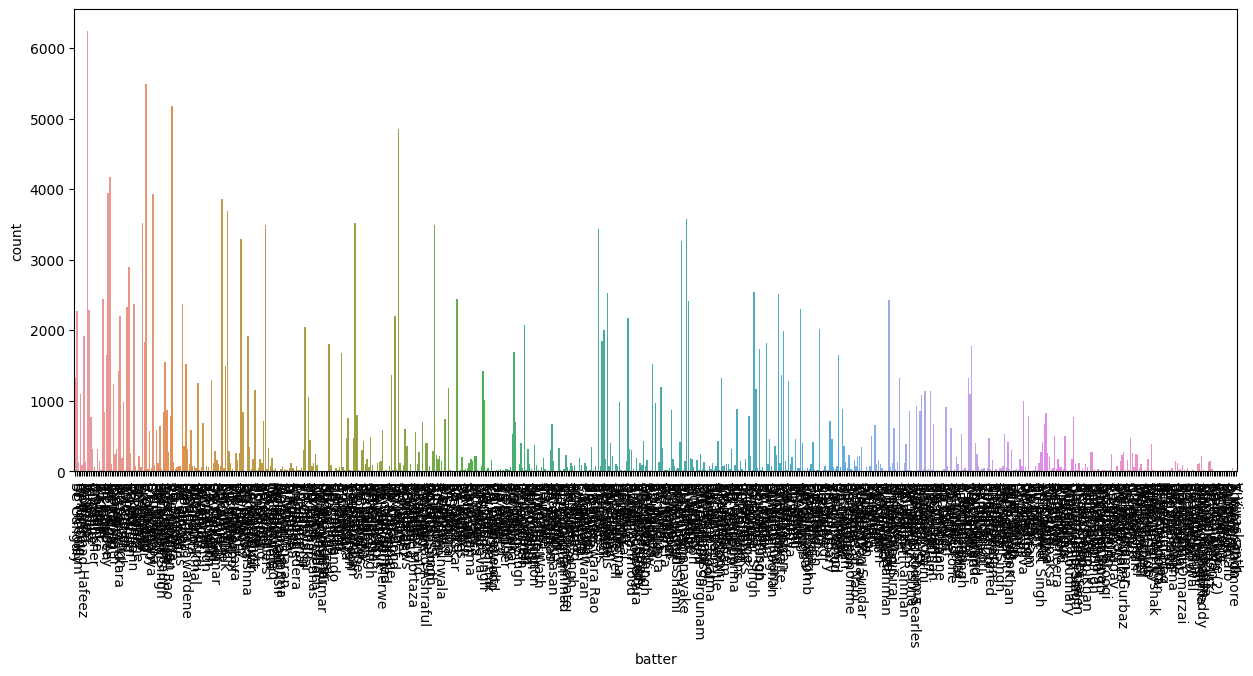

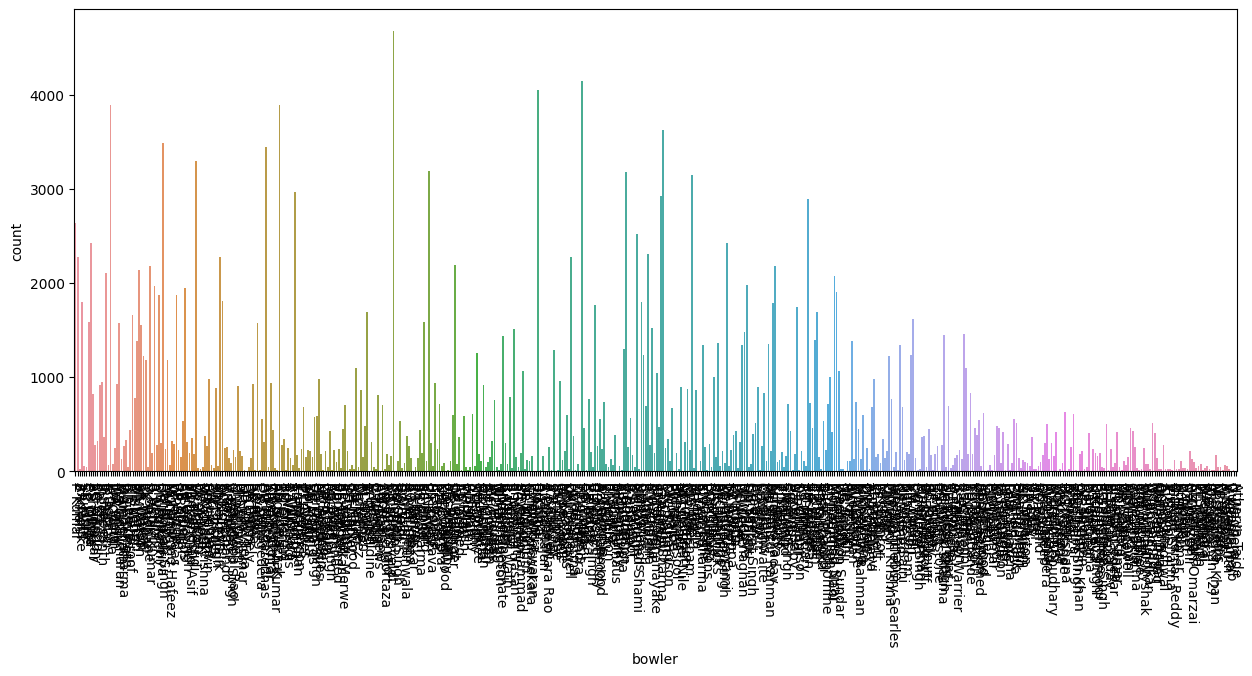

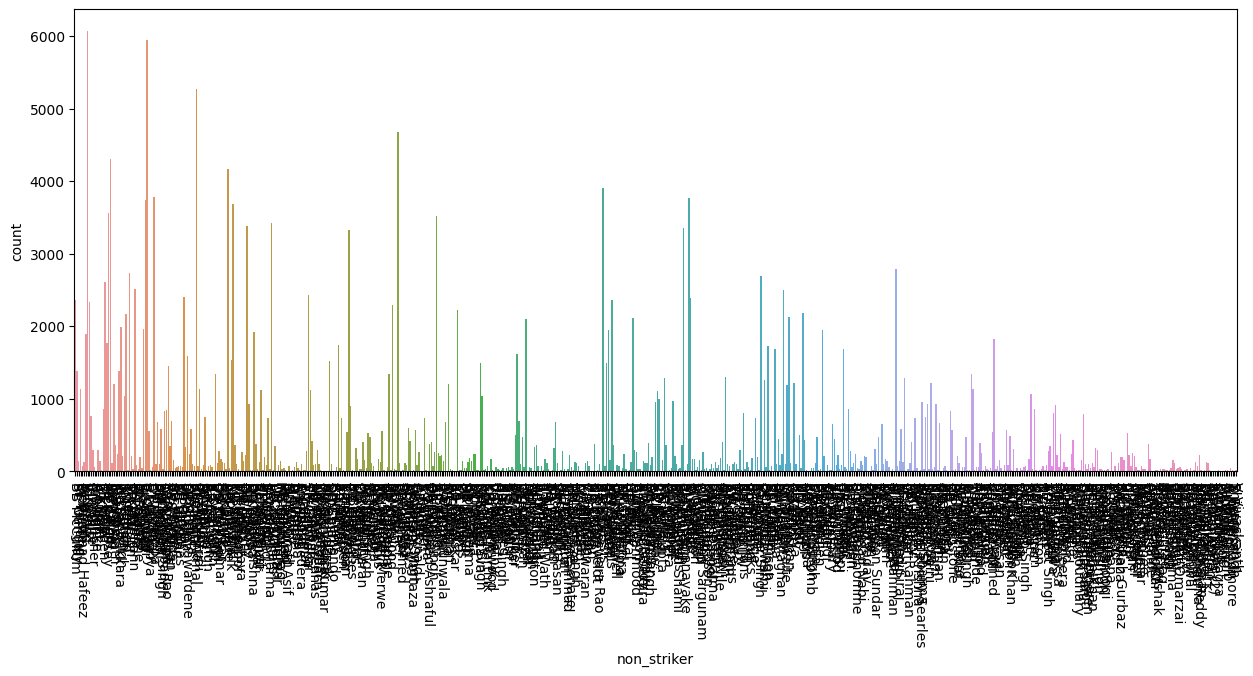

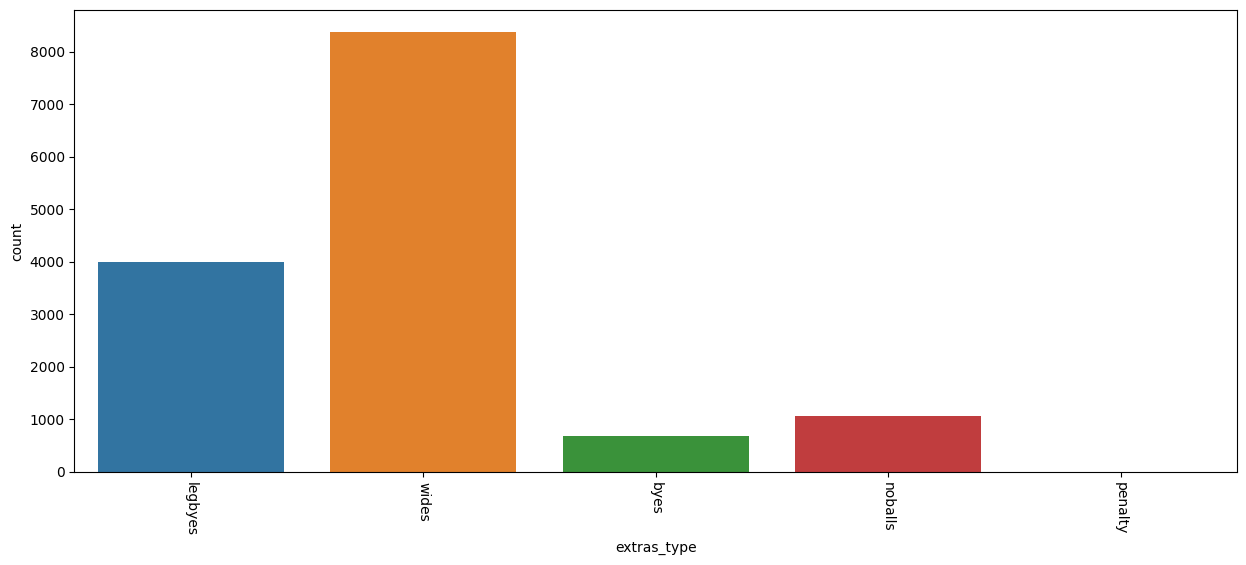

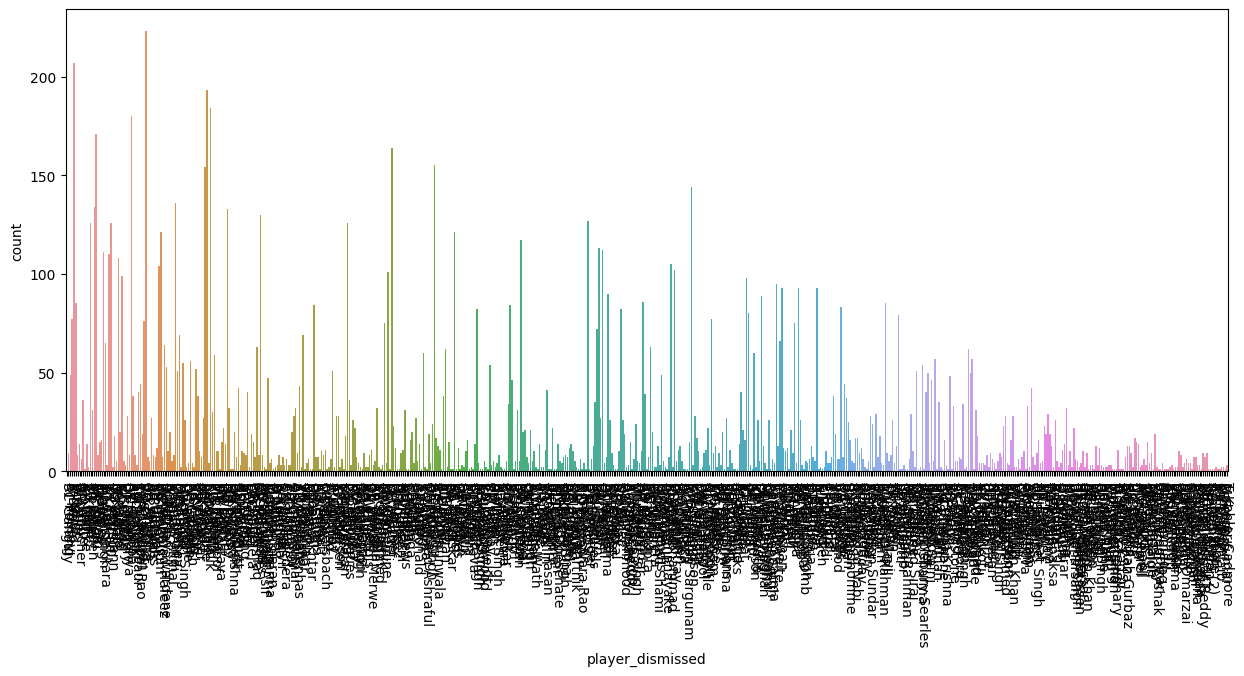

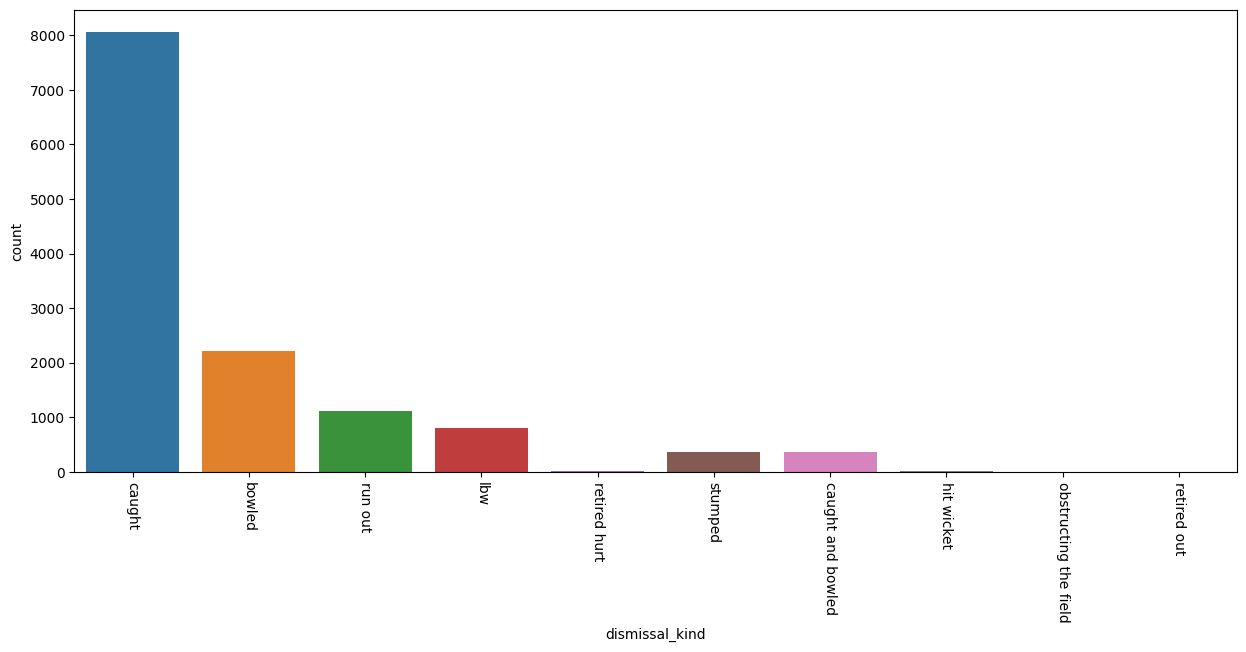

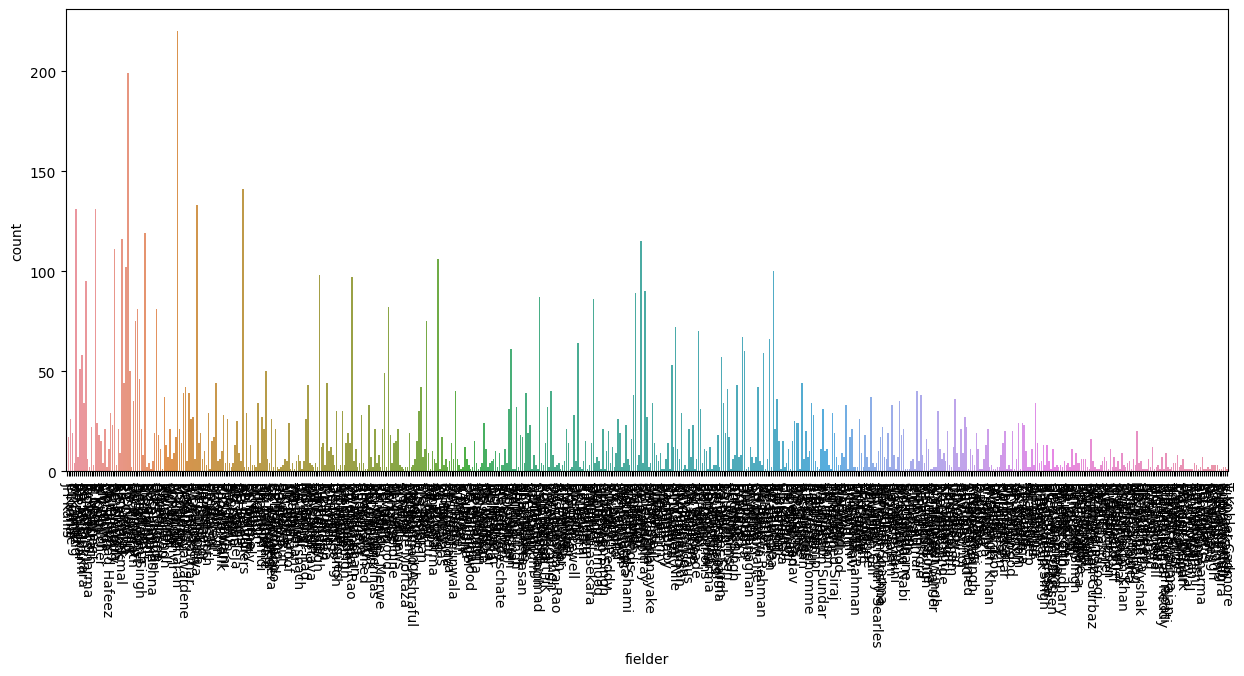

In [83]:
def viz1_cat1():
    for i in cat1.columns:
        plt.figure(figsize=(15, 6))
        sns.countplot(x=df1[i])
        plt.xticks(rotation=270)
        plt.show()
viz1_cat1()

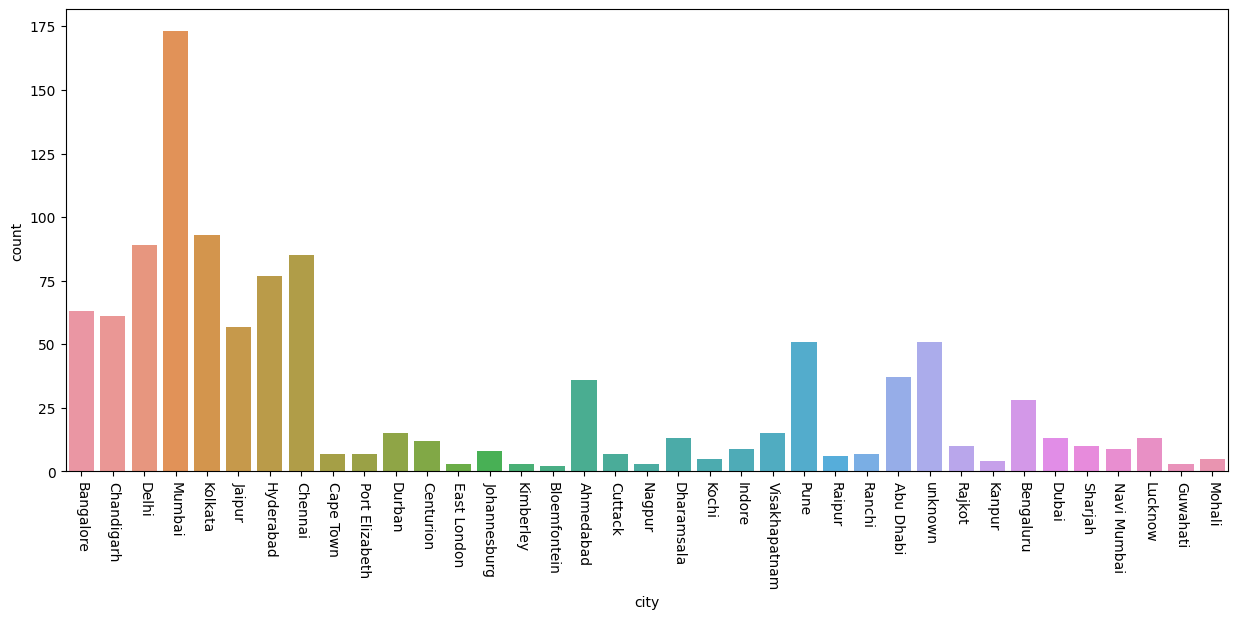

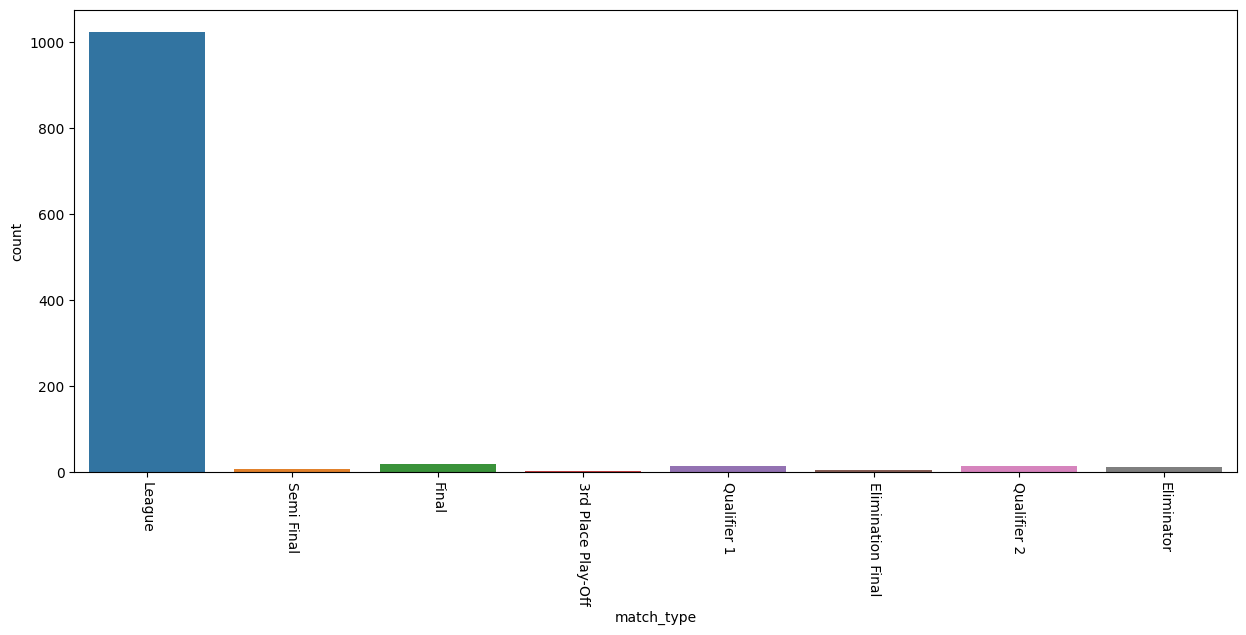

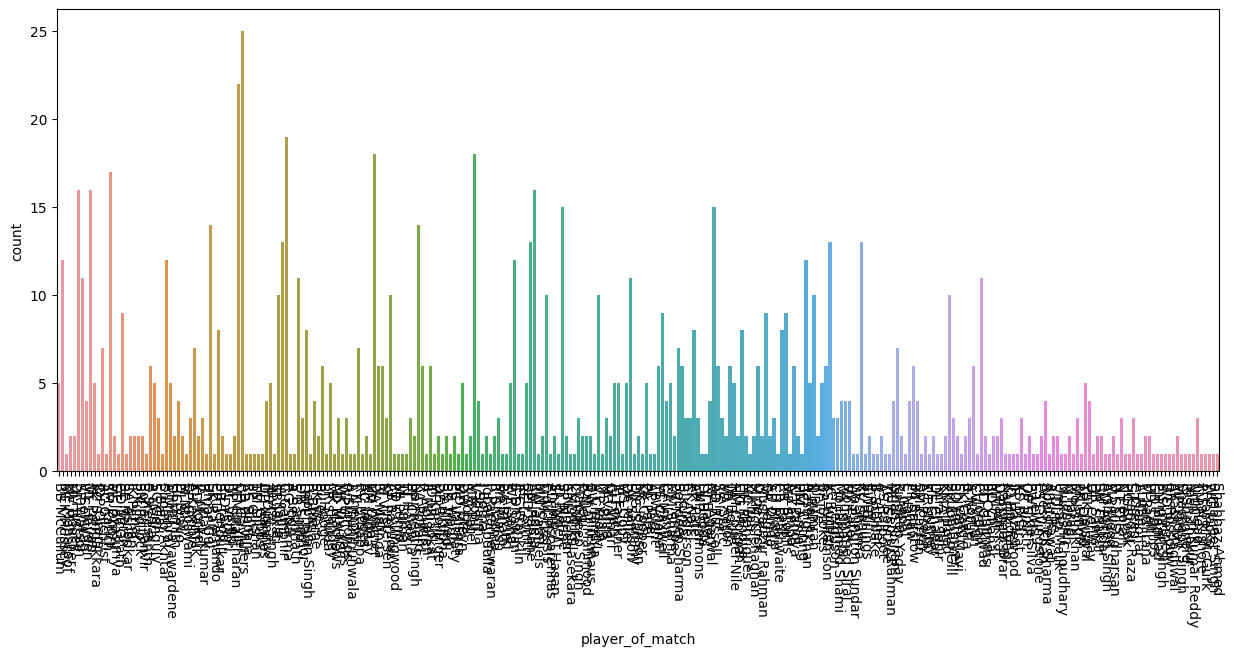

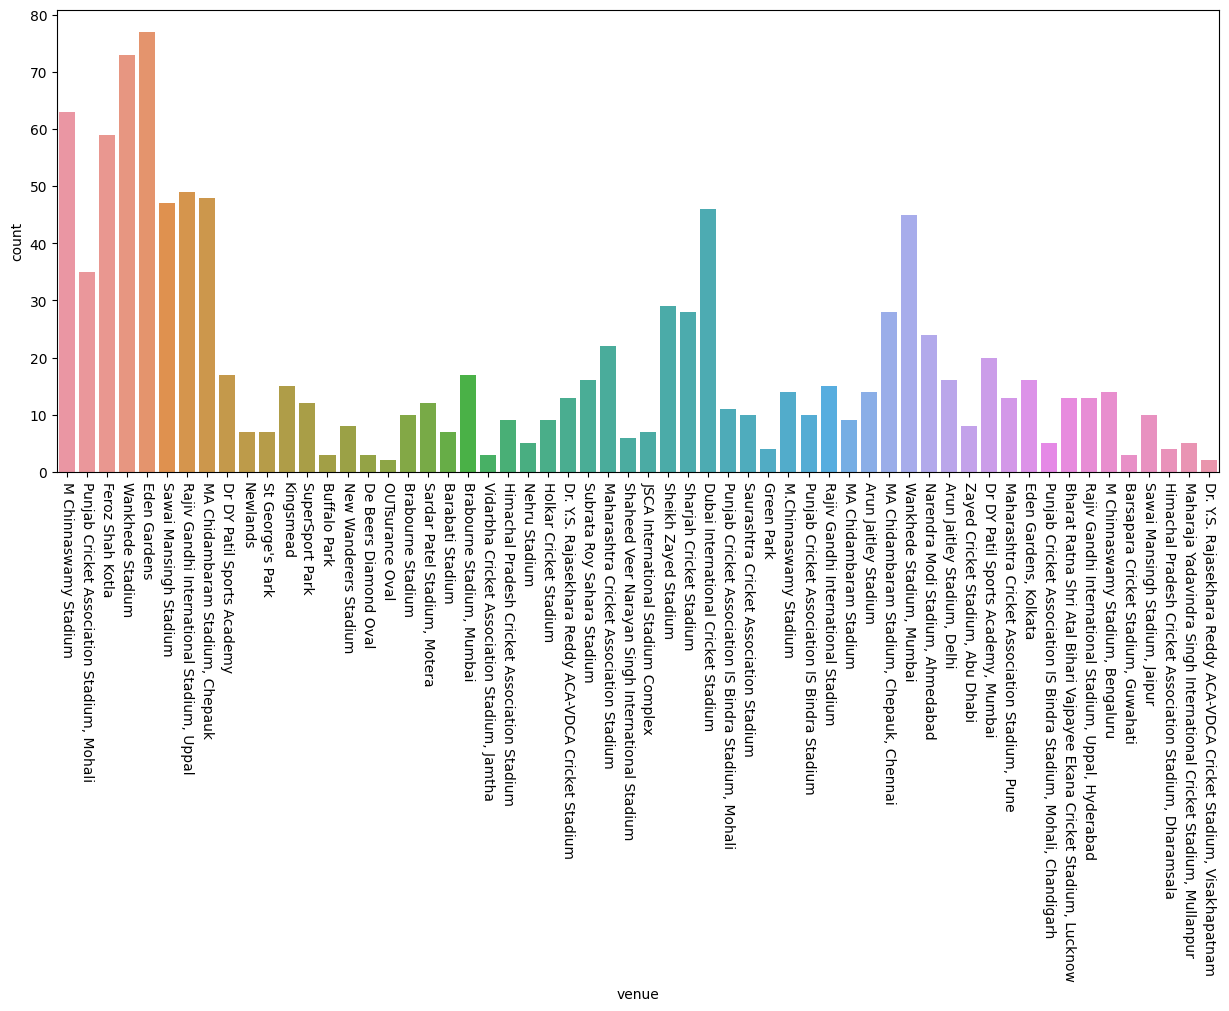

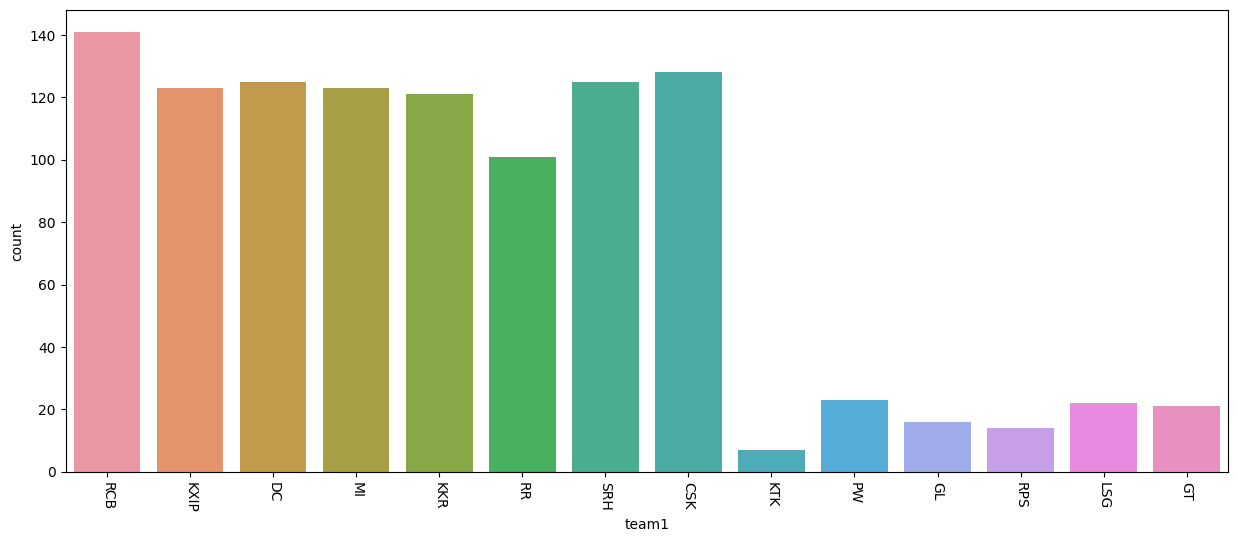

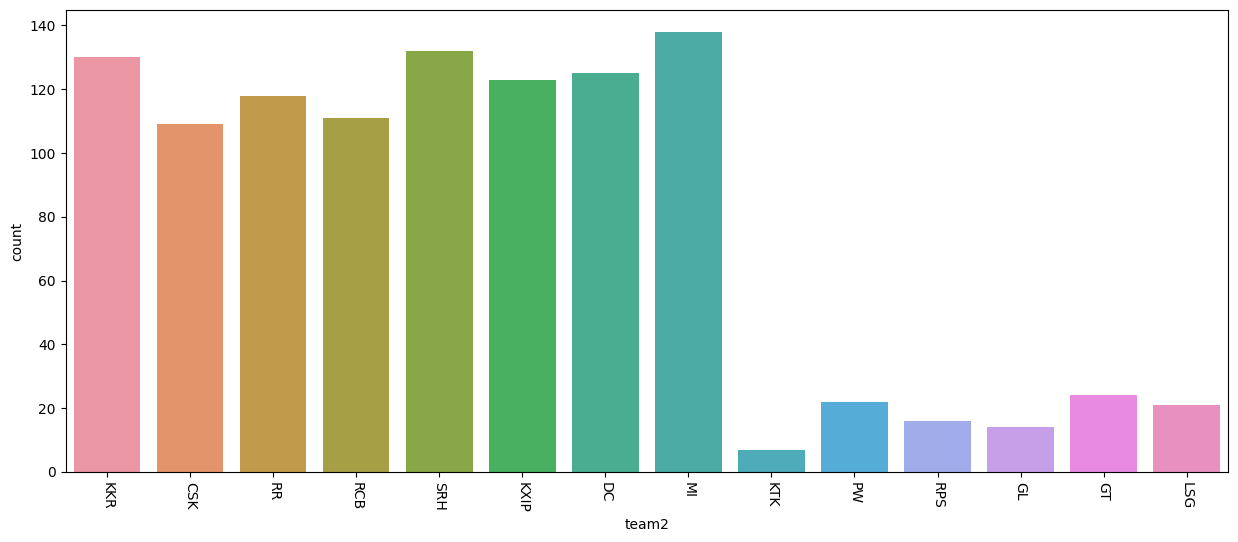

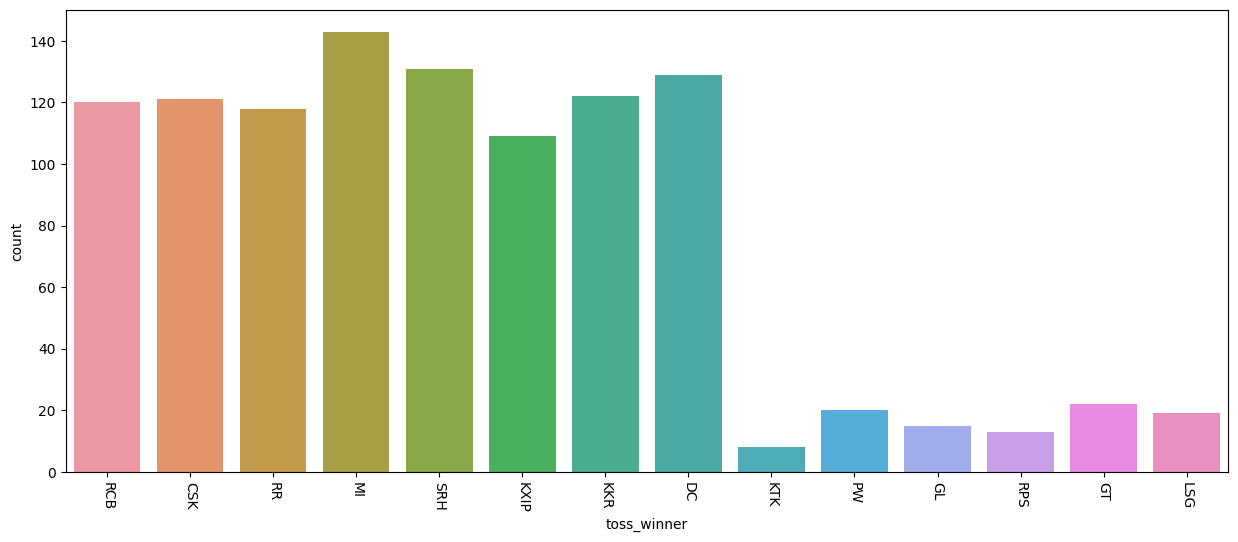

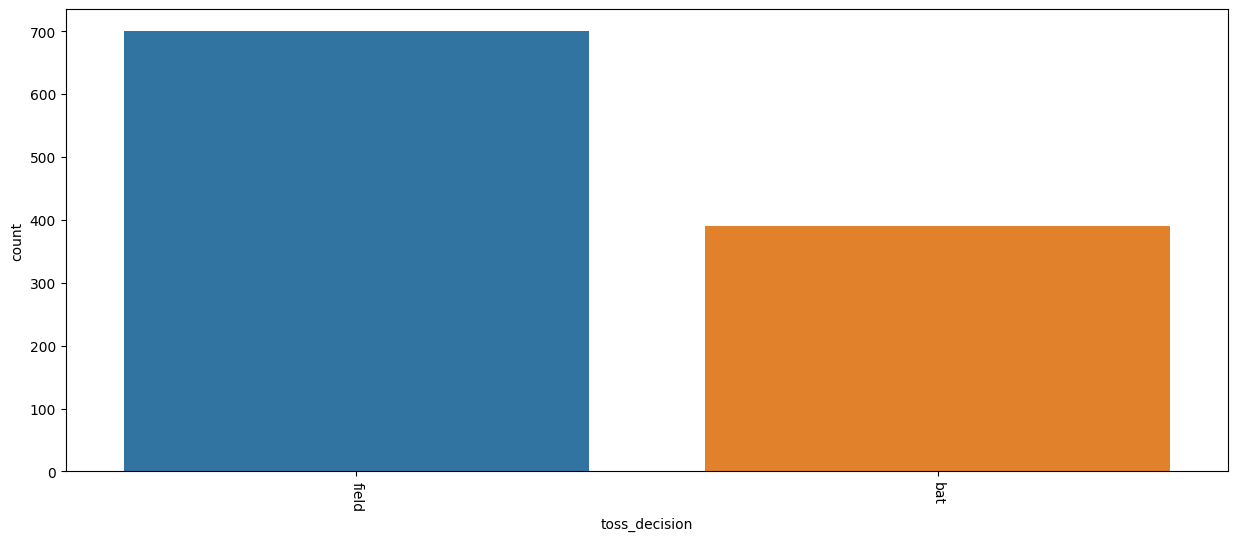

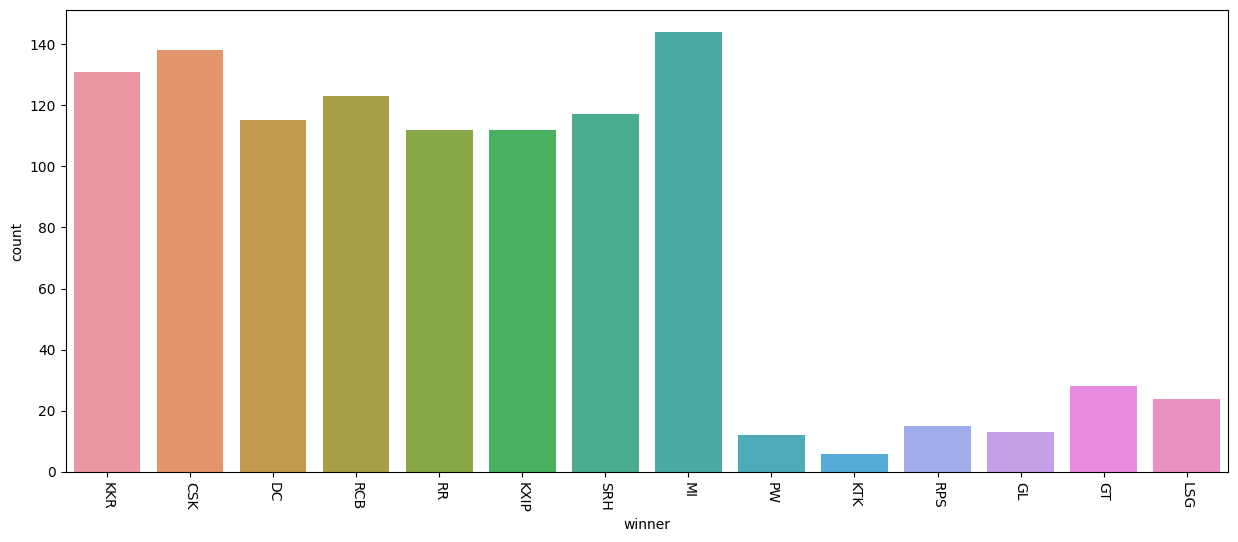

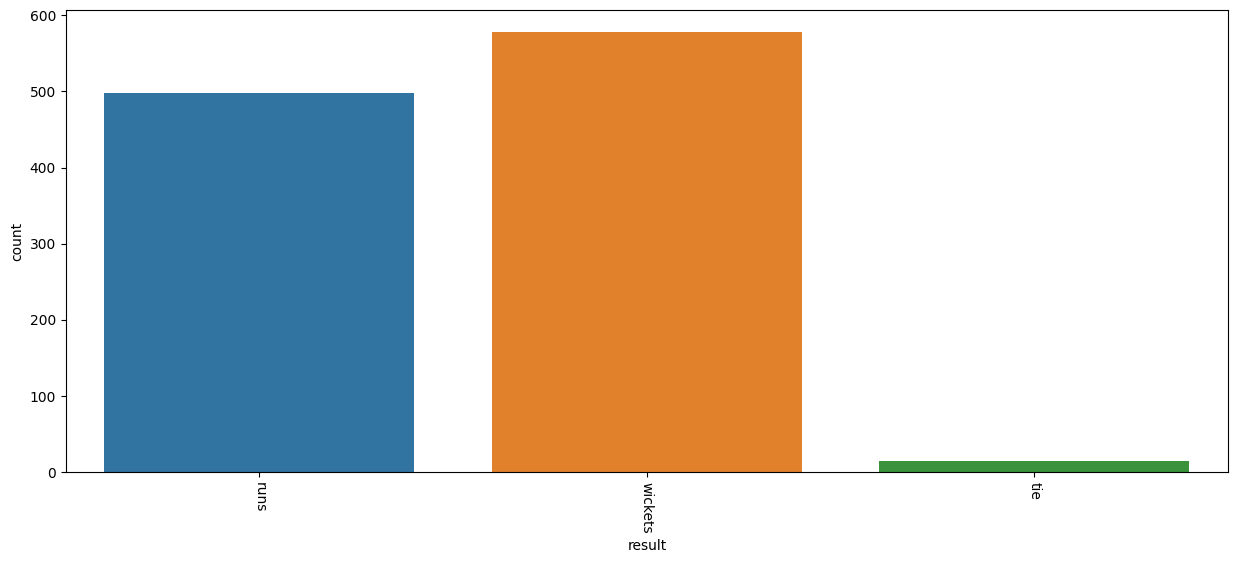

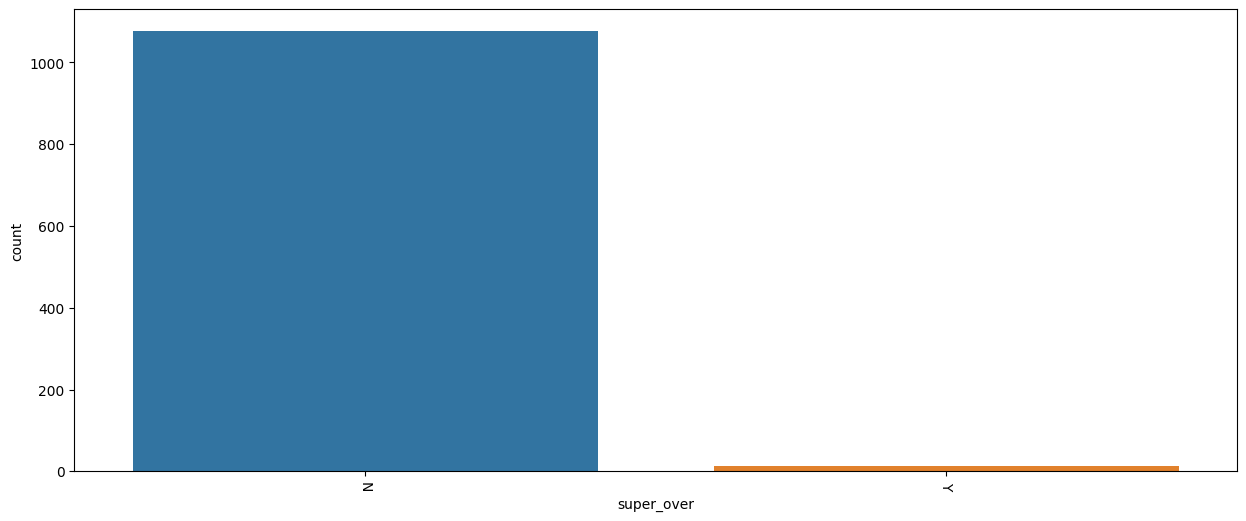

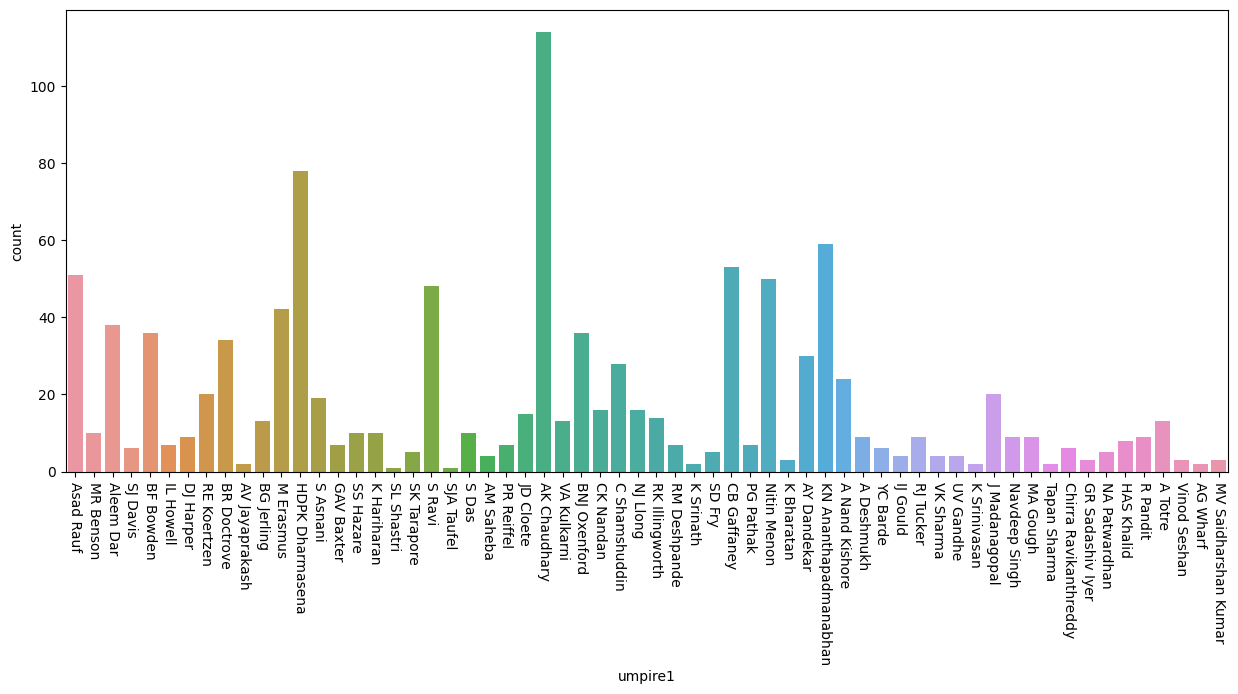

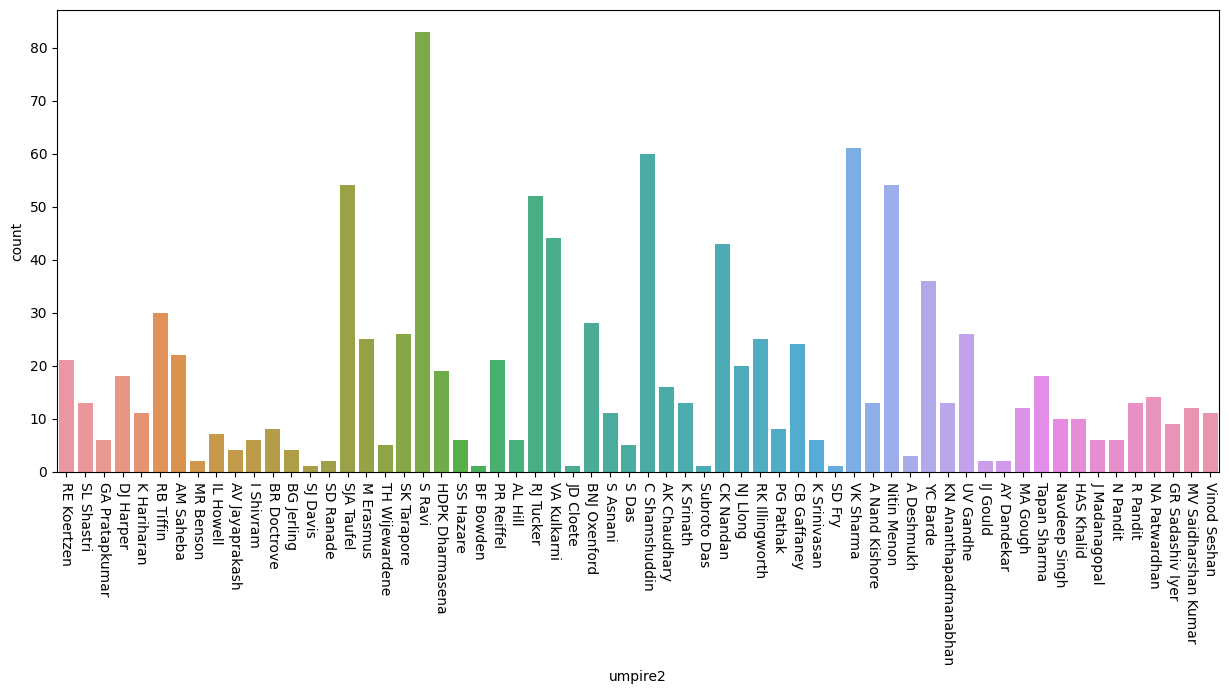

In [84]:
def viz2_cat2():
    for i in cat2.columns:
        plt.figure(figsize=(15, 6))
        sns.countplot(x=df2[i])
        plt.xticks(rotation=270)
        plt.show()
viz2_cat2()

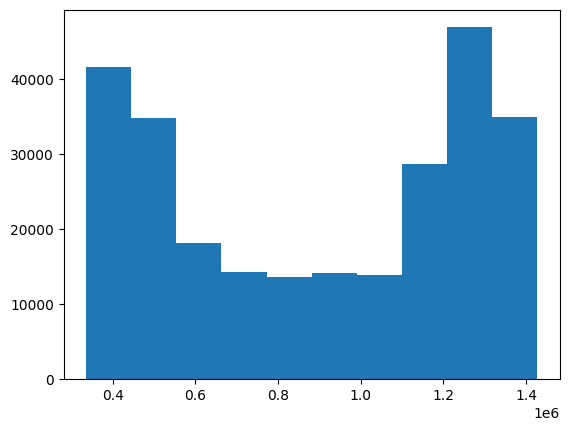

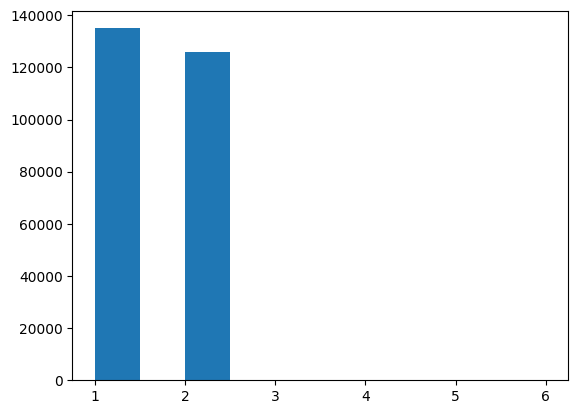

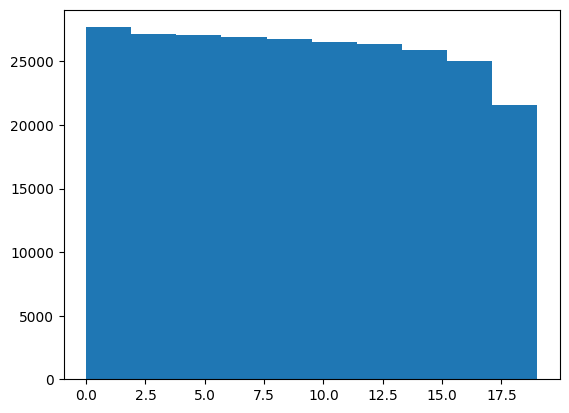

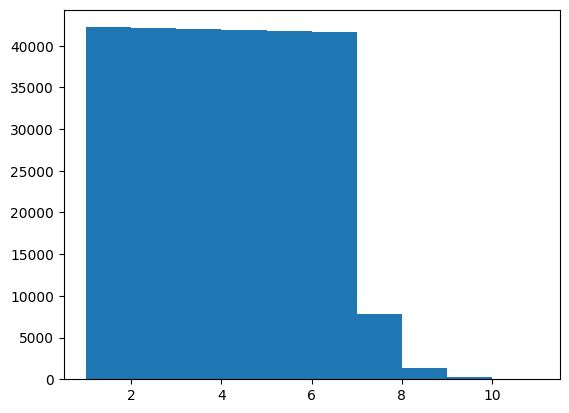

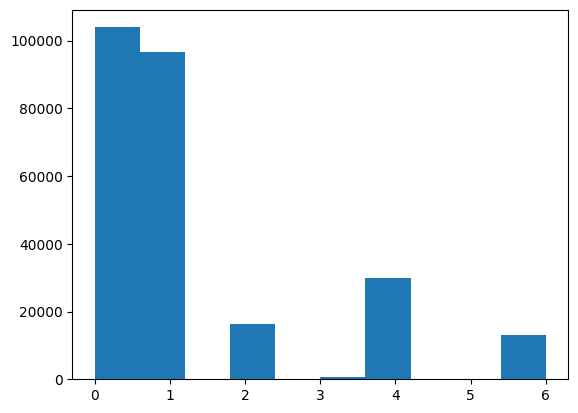

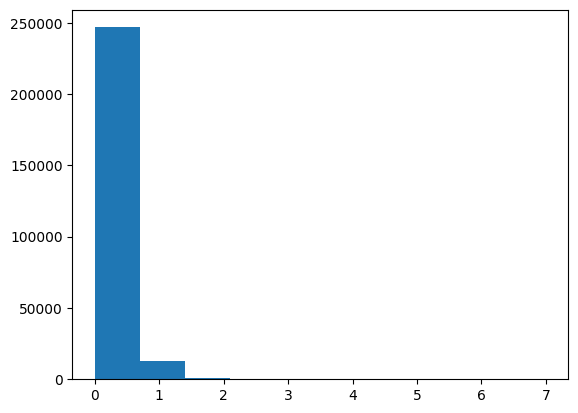

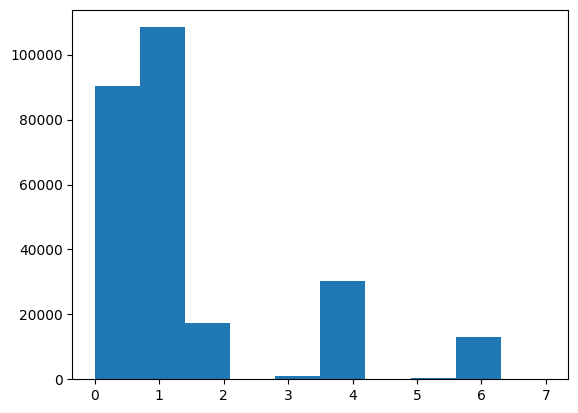

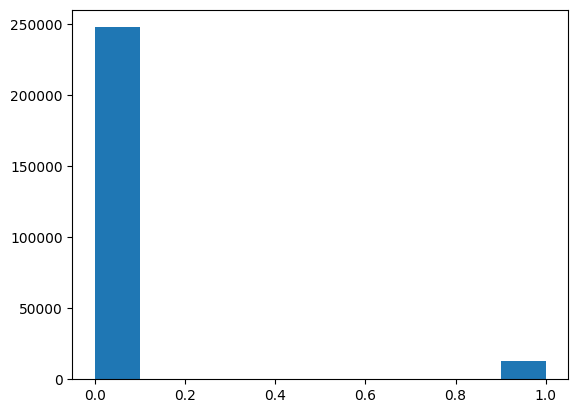

In [85]:
def viz3_num1():
    for i in num1.columns:
        plt.hist(df1[i])
        plt.show()
viz3_num1()

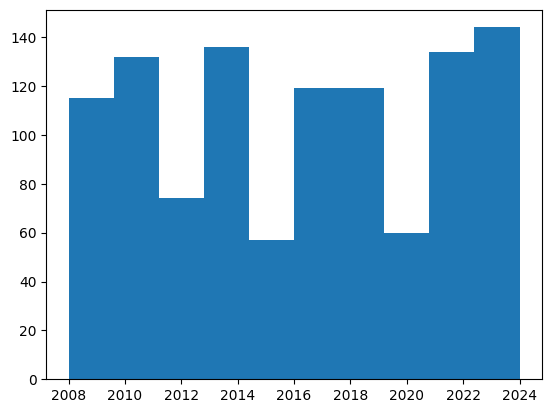

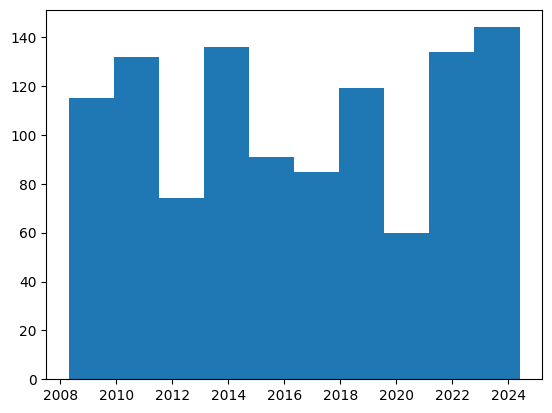

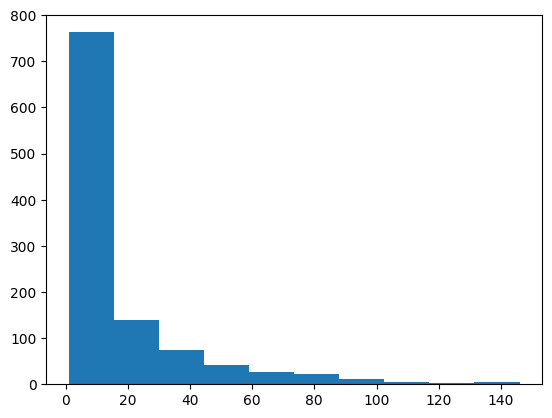

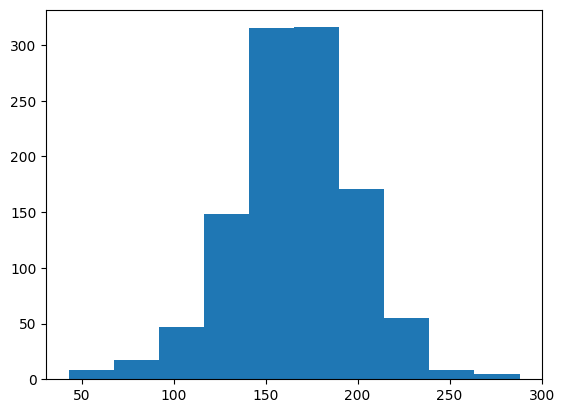

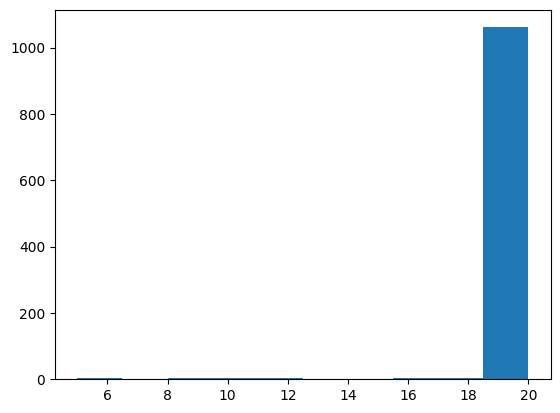

In [86]:
def viz4_num2():
    for i in num2.columns:
        plt.hist(df2[i])
        plt.show()
viz4_num2()

In [87]:
df_matches_count = df2['date'].dt.year.value_counts().reset_index().rename(columns={'date':'season','count':'matches'})

In [88]:
df_matches_count

season  matches
0     2013       76
1     2012       74
2     2022       74
3     2023       73
4     2011       72
5     2024       71
6     2018       60
7     2021       60
8     2020       60
9     2016       60
10    2014       60
11    2010       60
12    2017       59
13    2019       59
14    2008       58
15    2009       57
16    2015       57

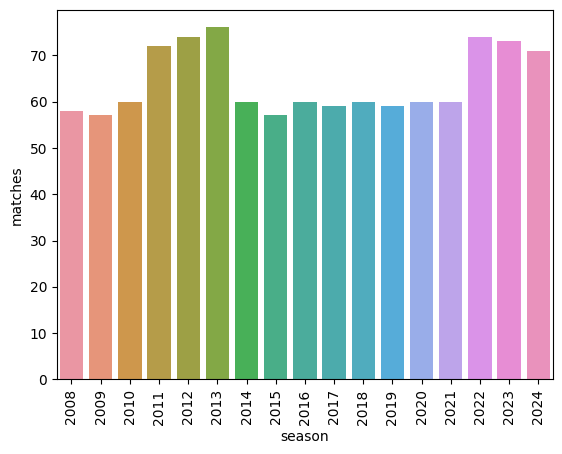

In [89]:
def groupby1():
    sns.barplot(x=df_matches_count["season"],y=df_matches_count["matches"])
    plt.xticks(rotation=90)
    plt.show()
groupby1()

In [90]:
head2()

   season        city       date match_type player_of_match  \
0    2008   Bangalore 2008-04-18     League     BB McCullum   
1    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2    2008       Delhi 2008-04-19     League     MF Maharoof   
3    2008      Mumbai 2008-04-20     League      MV Boucher   
4    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223.0          20.0   
1           bat    CSK     r

In [91]:
season_runs=df2.groupby("season")["target_runs"].sum().reset_index().rename(columns={"target_runs":"runs"})

In [92]:
season_runs

season     runs
0     2008   9267.0
1     2009   8482.0
2     2010   9947.0
3     2011  11091.0
4     2012  11732.0
5     2013  11924.0
6     2014   9743.0
7     2015   9365.0
8     2016   9647.0
9     2017   9759.0
10    2018  10212.0
11    2019  10001.0
12    2020  10230.0
13    2021   9619.0
14    2022  12737.0
15    2023  13388.0
16    2024  13532.0

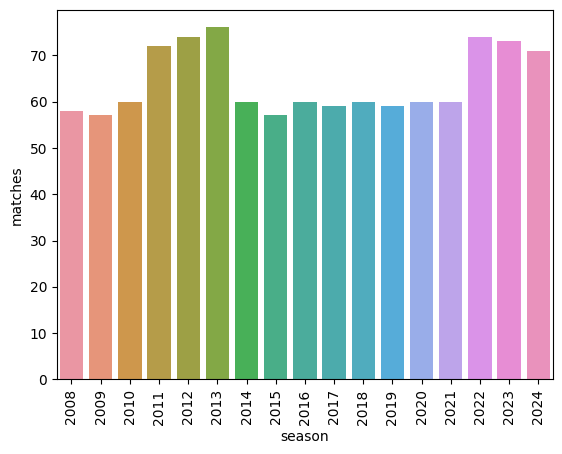

In [93]:
def groupby2():
    sns.barplot(x=season_runs["Season"],y=season_runs["runs"])
    plt.xticks(rotation=90)
    plt.show()
groupby1()

In [94]:
final=pd.merge(season_runs,df_matches_count,on="season",how="inner")
final["season_average"]=round(final["runs"]/final["matches"],2)

In [95]:
final

season     runs  matches  season_average
0     2008   9267.0       58          159.78
1     2009   8482.0       57          148.81
2     2010   9947.0       60          165.78
3     2011  11091.0       72          154.04
4     2012  11732.0       74          158.54
5     2013  11924.0       76          156.89
6     2014   9743.0       60          162.38
7     2015   9365.0       57          164.30
8     2016   9647.0       60          160.78
9     2017   9759.0       59          165.41
10    2018  10212.0       60          170.20
11    2019  10001.0       59          169.51
12    2020  10230.0       60          170.50
13    2021   9619.0       60          160.32
14    2022  12737.0       74          172.12
15    2023  13388.0       73          183.40
16    2024  13532.0       71          190.59

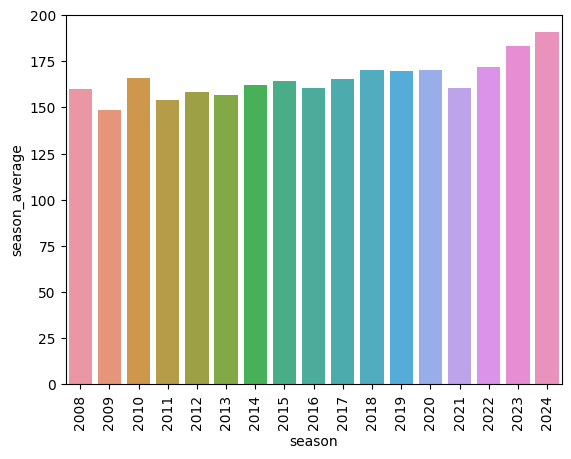

In [96]:
def groupby3():
    sns.barplot(x=final["season"],y=final["season_average"])
    plt.xticks(rotation=90)
    plt.show()
groupby3()

In [97]:
head2()

   season        city       date match_type player_of_match  \
0    2008   Bangalore 2008-04-18     League     BB McCullum   
1    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2    2008       Delhi 2008-04-19     League     MF Maharoof   
3    2008      Mumbai 2008-04-20     League      MV Boucher   
4    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223.0          20.0   
1           bat    CSK     r

In [98]:
a=df2["umpire1"].value_counts().reset_index().rename(columns={"umpire1":'umpire'})
b=df2["umpire2"].value_counts().reset_index().rename(columns={"umpire2":'umpire'})

In [99]:
a

umpire  count
0            AK Chaudhary    114
1         HDPK Dharmasena     78
2   KN Ananthapadmanabhan     59
3             CB Gaffaney     53
4               Asad Rauf     51
..                    ...    ...
57         AV Jayaprakash      2
58              K Srinath      2
59               AG Wharf      2
60             SL Shastri      1
61             SJA Taufel      1

[62 rows x 2 columns]

In [100]:
b

umpire  count
0          S Ravi     83
1       VK Sharma     61
2   C Shamshuddin     60
3     Nitin Menon     54
4      SJA Taufel     54
..            ...    ...
57    Subroto Das      1
58      JD Cloete      1
59       SJ Davis      1
60      BF Bowden      1
61         SD Fry      1

[62 rows x 2 columns]

In [101]:
umpires=a.merge(b,on="umpire",how="outer").fillna(0)

In [102]:
umpires

umpire  count_x  count_y
0       A Deshmukh      9.0      3.0
1   A Nand Kishore     24.0     13.0
2          A Totre     13.0      0.0
3         AG Wharf      2.0      0.0
4     AK Chaudhary    114.0     16.0
..             ...      ...      ...
65       UV Gandhe      4.0     26.0
66     VA Kulkarni     13.0     44.0
67       VK Sharma      4.0     61.0
68    Vinod Seshan      3.0     11.0
69        YC Barde      6.0     36.0

[70 rows x 3 columns]

In [103]:
umpires['count']=umpires['count_x']+umpires["count_y"]

In [104]:
umpires.sort_values("count",ascending=0).head(10)

umpire  count_x  count_y  count
54                 S Ravi     48.0     83.0  131.0
4            AK Chaudhary    114.0     16.0  130.0
43            Nitin Menon     50.0     54.0  104.0
24        HDPK Dharmasena     78.0     19.0   97.0
15          C Shamshuddin     28.0     60.0   88.0
16            CB Gaffaney     53.0     24.0   77.0
34  KN Ananthapadmanabhan     59.0     13.0   72.0
35              M Erasmus     42.0     25.0   67.0
67              VK Sharma      4.0     61.0   65.0
13           BNJ Oxenford     36.0     28.0   64.0

In [105]:
umpires

umpire  count_x  count_y  count
0       A Deshmukh      9.0      3.0   12.0
1   A Nand Kishore     24.0     13.0   37.0
2          A Totre     13.0      0.0   13.0
3         AG Wharf      2.0      0.0    2.0
4     AK Chaudhary    114.0     16.0  130.0
..             ...      ...      ...    ...
65       UV Gandhe      4.0     26.0   30.0
66     VA Kulkarni     13.0     44.0   57.0
67       VK Sharma      4.0     61.0   65.0
68    Vinod Seshan      3.0     11.0   14.0
69        YC Barde      6.0     36.0   42.0

[70 rows x 4 columns]

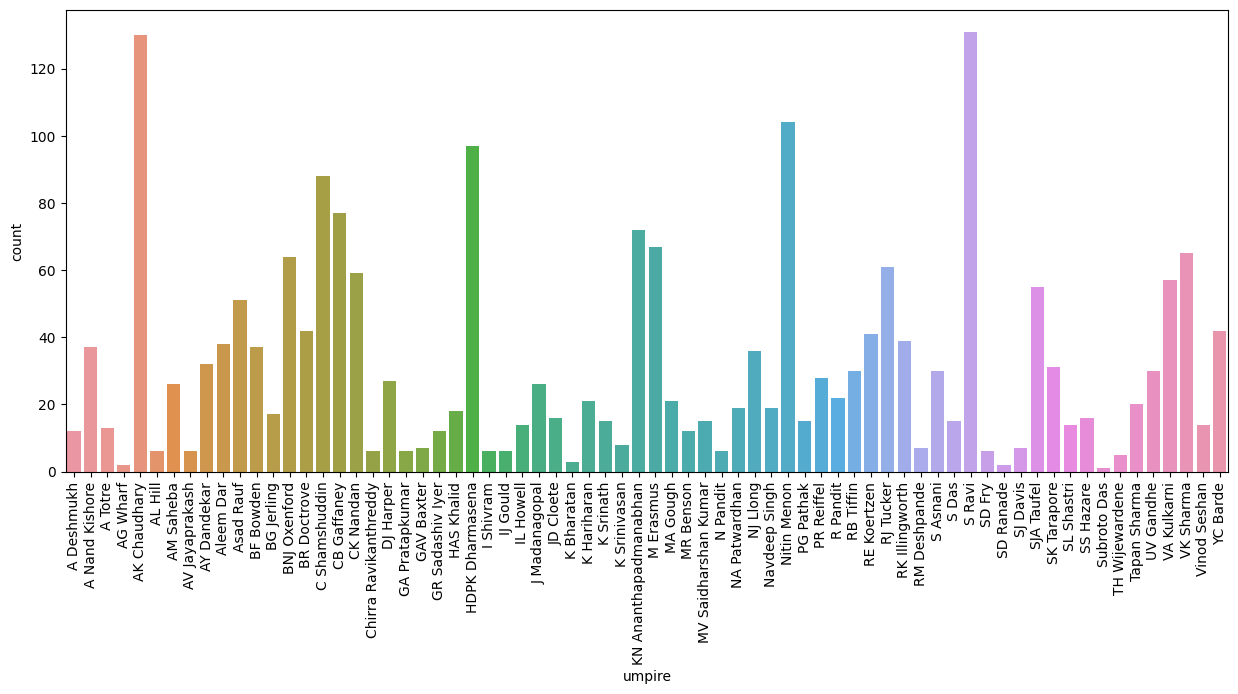

In [106]:
def group4():
    plt.figure(figsize=(15, 6))
    sns.barplot(x=umpires['umpire'],y=umpires['count'])
    plt.xticks(rotation=90)
    plt.show()
group4()

In [107]:
head2()

   season        city       date match_type player_of_match  \
0    2008   Bangalore 2008-04-18     League     BB McCullum   
1    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2    2008       Delhi 2008-04-19     League     MF Maharoof   
3    2008      Mumbai 2008-04-20     League      MV Boucher   
4    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223.0          20.0   
1           bat    CSK     r

In [108]:
toss_won=df2.groupby("team1")['toss_winner'].count().reset_index()

In [109]:
toss_won

team1  toss_winner
0    CSK          128
1     DC          125
2     GL           16
3     GT           21
4    KKR          121
5    KTK            7
6   KXIP          123
7    LSG           22
8     MI          123
9     PW           23
10   RCB          141
11   RPS           14
12    RR          101
13   SRH          125

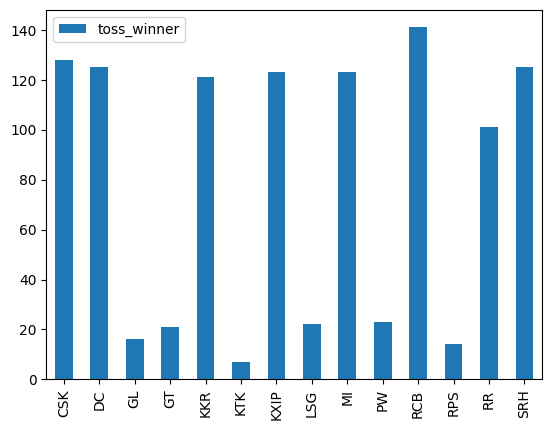

In [110]:
def groupby5():
    toss_won.plot(kind="bar")
    plt.xticks(ticks=range(len(toss_won['team1'].unique())), labels=toss_won['team1'].unique(), rotation=90)
    plt.show()
groupby5()

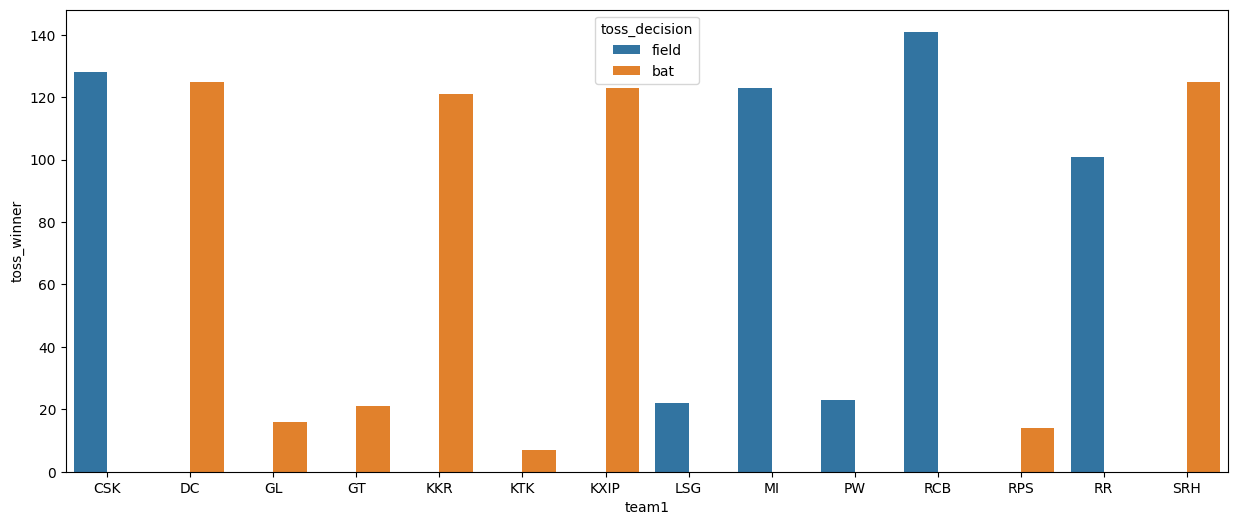

In [111]:
def groupby6():
    plt.figure(figsize=(15,6))
    sns.barplot(x=toss_won["team1"],y=toss_won["toss_winner"],hue=df2["toss_decision"])
    plt.show()
groupby6()

**after toss teamwise mostly prefered opinion**

In [112]:
head2()

   season        city       date match_type player_of_match  \
0    2008   Bangalore 2008-04-18     League     BB McCullum   
1    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2    2008       Delhi 2008-04-19     League     MF Maharoof   
3    2008      Mumbai 2008-04-20     League      MV Boucher   
4    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223.0          20.0   
1           bat    CSK     r

In [113]:
prefer=df2.groupby("toss_winner",as_index=False)["toss_decision"].value_counts()

In [114]:
prefer

toss_winner toss_decision  count
0          CSK         field     62
1          CSK           bat     59
2           DC         field     89
3           DC           bat     40
4           GL         field     14
5           GL           bat      1
6           GT         field     16
7           GT           bat      6
8          KKR         field     84
9          KKR           bat     38
10         KTK         field      5
11         KTK           bat      3
12        KXIP         field     77
13        KXIP           bat     32
14         LSG         field     13
15         LSG           bat      6
16          MI         field     90
17          MI           bat     53
18          PW           bat     11
19          PW         field      9
20         RCB         field     85
21         RCB           bat     35
22         RPS         field     10
23         RPS           bat      3
24          RR         field     74
25          RR           bat     44
26         SRH         field     72
27         SRH           bat     59

In [115]:
season=df2.groupby(["season","team1"],as_index=False)["toss_winner"].size().rename(columns={"size":"win_toss"})

In [116]:
season

season team1  win_toss
0      2008   CSK         9
1      2008    DC         7
2      2008   KKR         7
3      2008  KXIP         7
4      2008    MI         7
..      ...   ...       ...
140    2024   LSG         8
141    2024    MI         5
142    2024   RCB         9
143    2024    RR         5
144    2024   SRH        10

[145 rows x 3 columns]

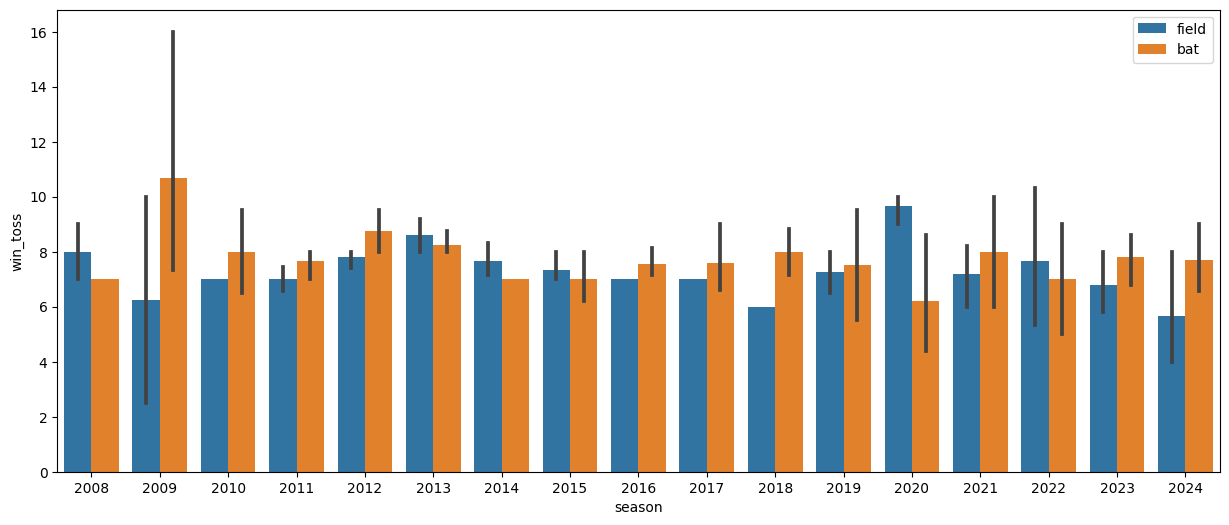

In [117]:
def groupby6():
    plt.figure(figsize=(15,6))
    sns.barplot(x=season["season"],y=season["win_toss"],hue=df2["toss_decision"])
    plt.legend(loc="upper right")
    plt.show()
groupby6()

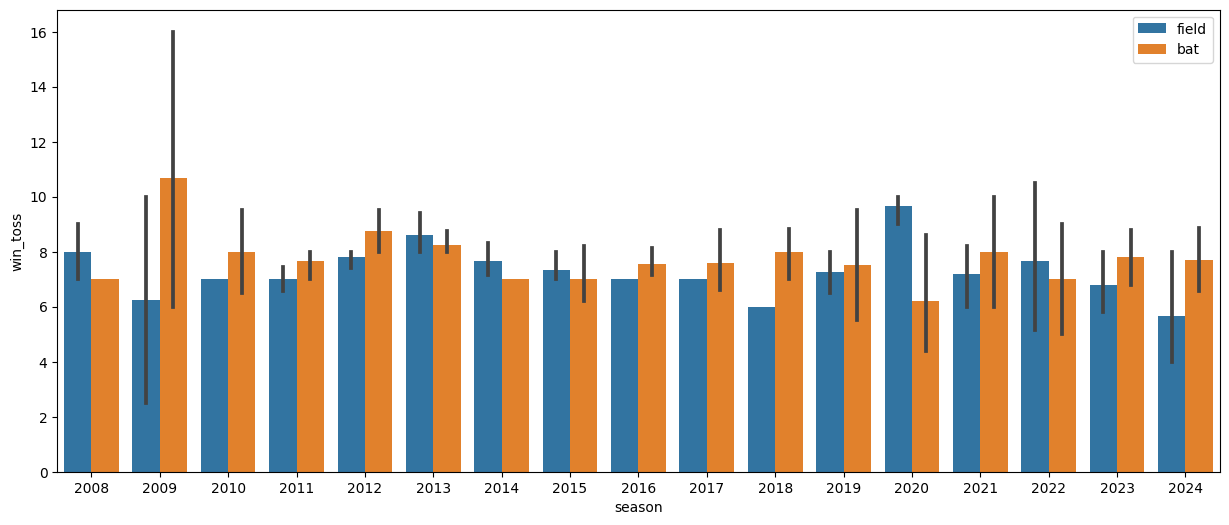

In [118]:
def groupby7():
    plt.figure(figsize=(20,6))
    sns.barplot(x=season["season"],y=season["win_toss"],hue=season["team1"])
    plt.legend(loc="upper right")
    plt.show()
groupby6()

In [119]:
head2()

   season        city       date match_type player_of_match  \
0    2008   Bangalore 2008-04-18     League     BB McCullum   
1    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2    2008       Delhi 2008-04-19     League     MF Maharoof   
3    2008      Mumbai 2008-04-20     League      MV Boucher   
4    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223.0          20.0   
1           bat    CSK     r

In [120]:
toss_vs_winning = df2[['toss_winner','winner','season']]
toss_vs_winning['toss_imply_winner'] = toss_vs_winning["toss_winner"] == toss_vs_winning['winner']
winning_impact_percent = round(toss_vs_winning['toss_imply_winner'].sum() / toss_vs_winning.shape[0] * 100,2)
print(winning_impact_percent,"% chance of winning the toss winning the game in IPL Seasons")

50.83 % chance of winning the toss winning the game in IPL Seasons


In [121]:
toss_vs_winning

toss_winner winner  season  toss_imply_winner
0            RCB    KKR    2008              False
1            CSK    CSK    2008               True
2             RR     DC    2008              False
3             MI    RCB    2008              False
4            SRH    KKR    2008              False
...          ...    ...     ...                ...
1090        KXIP    SRH    2024              False
1091         SRH    KKR    2024              False
1092          RR     RR    2024               True
1093          RR    SRH    2024              False
1094         SRH    KKR    2024              False

[1090 rows x 4 columns]

In [122]:
season_avg_toss_win=toss_vs_winning.groupby("season",as_index=False)["toss_imply_winner"].sum()

In [123]:
season_avg_toss_win

season  toss_imply_winner
0     2008                 28
1     2009                 33
2     2010                 31
3     2011                 38
4     2012                 33
5     2013                 36
6     2014                 30
7     2015                 28
8     2016                 34
9     2017                 34
10    2018                 32
11    2019                 36
12    2020                 25
13    2021                 35
14    2022                 36
15    2023                 34
16    2024                 31

In [124]:
t=df2.groupby("season",as_index=False)["season"].size().rename(columns={"size":"total_matches"})

In [125]:
t

season  total_matches
0     2008             58
1     2009             57
2     2010             60
3     2011             72
4     2012             74
5     2013             76
6     2014             60
7     2015             57
8     2016             60
9     2017             59
10    2018             60
11    2019             59
12    2020             60
13    2021             60
14    2022             74
15    2023             73
16    2024             71

In [126]:
toss=pd.merge(season_avg_toss_win,t,on="season")

In [127]:
toss

season  toss_imply_winner  total_matches
0     2008                 28             58
1     2009                 33             57
2     2010                 31             60
3     2011                 38             72
4     2012                 33             74
5     2013                 36             76
6     2014                 30             60
7     2015                 28             57
8     2016                 34             60
9     2017                 34             59
10    2018                 32             60
11    2019                 36             59
12    2020                 25             60
13    2021                 35             60
14    2022                 36             74
15    2023                 34             73
16    2024                 31             71

In [128]:
toss["average"]=round((toss["toss_imply_winner"]/toss["total_matches"])*100,2)

In [129]:
toss

season  toss_imply_winner  total_matches  average
0     2008                 28             58    48.28
1     2009                 33             57    57.89
2     2010                 31             60    51.67
3     2011                 38             72    52.78
4     2012                 33             74    44.59
5     2013                 36             76    47.37
6     2014                 30             60    50.00
7     2015                 28             57    49.12
8     2016                 34             60    56.67
9     2017                 34             59    57.63
10    2018                 32             60    53.33
11    2019                 36             59    61.02
12    2020                 25             60    41.67
13    2021                 35             60    58.33
14    2022                 36             74    48.65
15    2023                 34             73    46.58
16    2024                 31             71    43.66

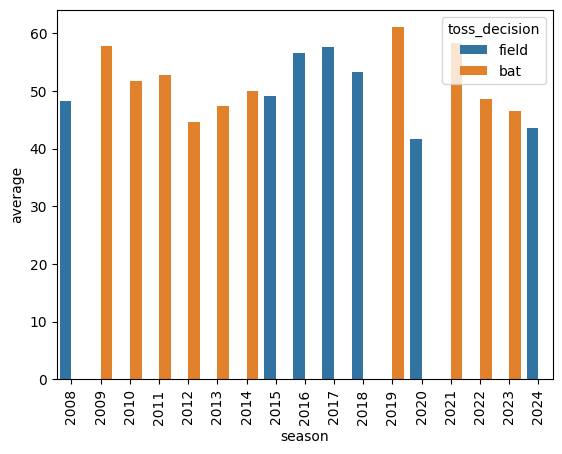

In [130]:
def toss_imply_winner():
    sns.barplot(x=toss["season"],y=toss["average"],hue=df2['toss_decision'])
    plt.xticks(rotation=90)
    plt.show()
    
toss_imply_winner()

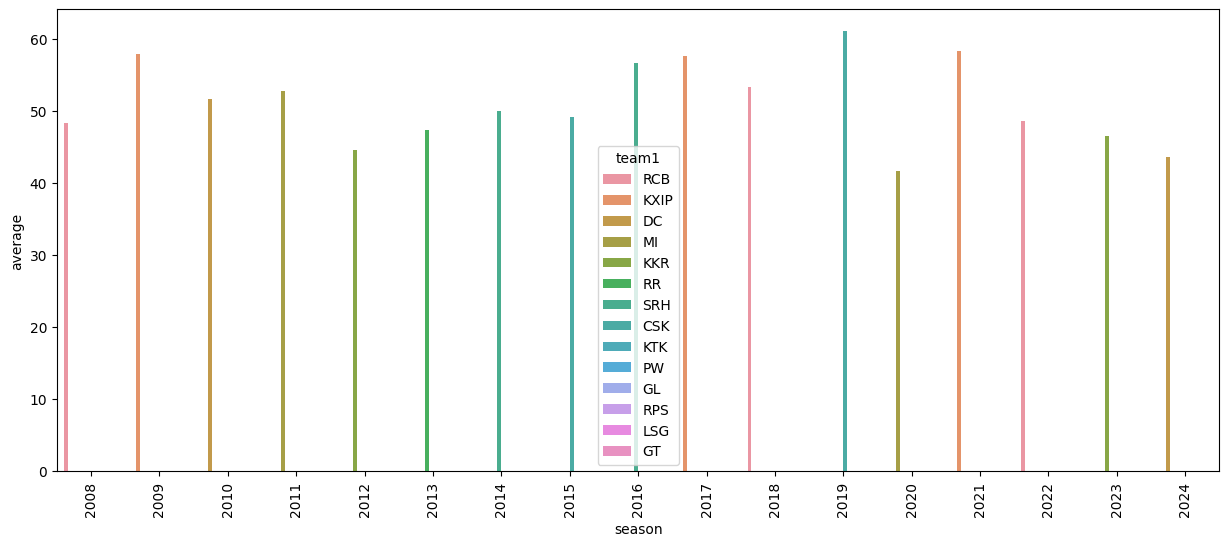

In [131]:
def toss_imply_winner():
    plt.figure(figsize=(15,6))
    sns.barplot(x=toss["season"],y=toss["average"],hue=df2["team1"])
    plt.xticks(rotation=90)
    plt.show()
toss_imply_winner()

In [132]:
head2()

   season        city       date match_type player_of_match  \
0    2008   Bangalore 2008-04-18     League     BB McCullum   
1    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2    2008       Delhi 2008-04-19     League     MF Maharoof   
3    2008      Mumbai 2008-04-20     League      MV Boucher   
4    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223.0          20.0   
1           bat    CSK     r

In [133]:
def chasing(row):
    if row['toss_winner'] == row['team1']:
        return row['team2']
    else:
        return row['team1']


In [134]:
def modify5():
    df2["chasing"]=df2.apply(chasing,axis=1)
modify5()

In [135]:
chase_imp=df2[["chasing","toss_winner","winner","season"]]

In [136]:
chase_imp['chasing_imply_winner'] = chase_imp["chasing"] == chase_imp['winner']
winning_impact_percent = round(chase_imp['chasing_imply_winner'].sum() / chase_imp.shape[0] * 100,2)
print(winning_impact_percent,"% chance of winning the toss winning the game in IPL Seasons")

49.17 % chance of winning the toss winning the game in IPL Seasons


In [137]:
chasing_imp=chase_imp.groupby("season",as_index=False)["chasing_imply_winner"].sum()

In [138]:
chasing_imp

season  chasing_imply_winner
0     2008                    30
1     2009                    24
2     2010                    29
3     2011                    34
4     2012                    41
5     2013                    40
6     2014                    30
7     2015                    29
8     2016                    26
9     2017                    25
10    2018                    28
11    2019                    23
12    2020                    35
13    2021                    25
14    2022                    38
15    2023                    39
16    2024                    40

In [139]:
t=df2.groupby("season",as_index=False)["season"].size().rename(columns={"size":"total_matches"})
chase_imp=pd.merge(chasing_imp,t,on="season")
chase_imp["average"]=round((chase_imp["chasing_imply_winner"]/chase_imp["total_matches"])*100,2)

In [140]:
chase_imp

season  chasing_imply_winner  total_matches  average
0     2008                    30             58    51.72
1     2009                    24             57    42.11
2     2010                    29             60    48.33
3     2011                    34             72    47.22
4     2012                    41             74    55.41
5     2013                    40             76    52.63
6     2014                    30             60    50.00
7     2015                    29             57    50.88
8     2016                    26             60    43.33
9     2017                    25             59    42.37
10    2018                    28             60    46.67
11    2019                    23             59    38.98
12    2020                    35             60    58.33
13    2021                    25             60    41.67
14    2022                    38             74    51.35
15    2023                    39             73    53.42
16    2024                    40             71    56.34

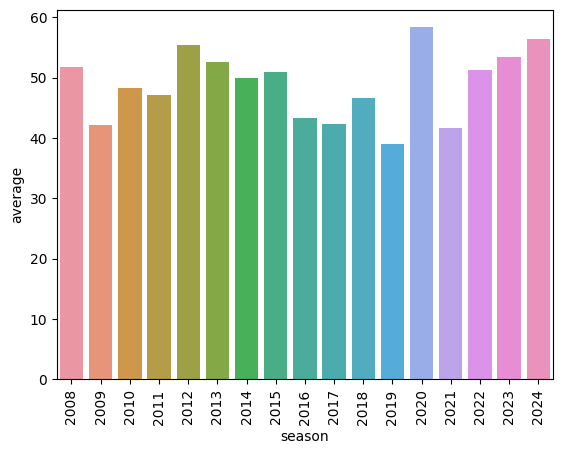

In [141]:
def chasing_imply_winner():
    sns.barplot(x=chase_imp["season"],y=chase_imp["average"])
    plt.xticks(rotation=90)
    plt.show()
    
chasing_imply_winner()

In [142]:
head2()

   season        city       date match_type player_of_match  \
0    2008   Bangalore 2008-04-18     League     BB McCullum   
1    2008  Chandigarh 2008-04-19     League      MEK Hussey   
2    2008       Delhi 2008-04-19     League     MF Maharoof   
3    2008      Mumbai 2008-04-20     League      MV Boucher   
4    2008     Kolkata 2008-04-20     League       DJ Hussey   

                                        venue team1 team2 toss_winner  \
0                       M Chinnaswamy Stadium   RCB   KKR         RCB   
1  Punjab Cricket Association Stadium, Mohali  KXIP   CSK         CSK   
2                            Feroz Shah Kotla    DC    RR          RR   
3                            Wankhede Stadium    MI   RCB          MI   
4                                Eden Gardens   KKR   SRH         SRH   

  toss_decision winner   result  result_margin  target_runs  target_overs  \
0         field    KKR     runs          140.0        223.0          20.0   
1           bat    CSK     r

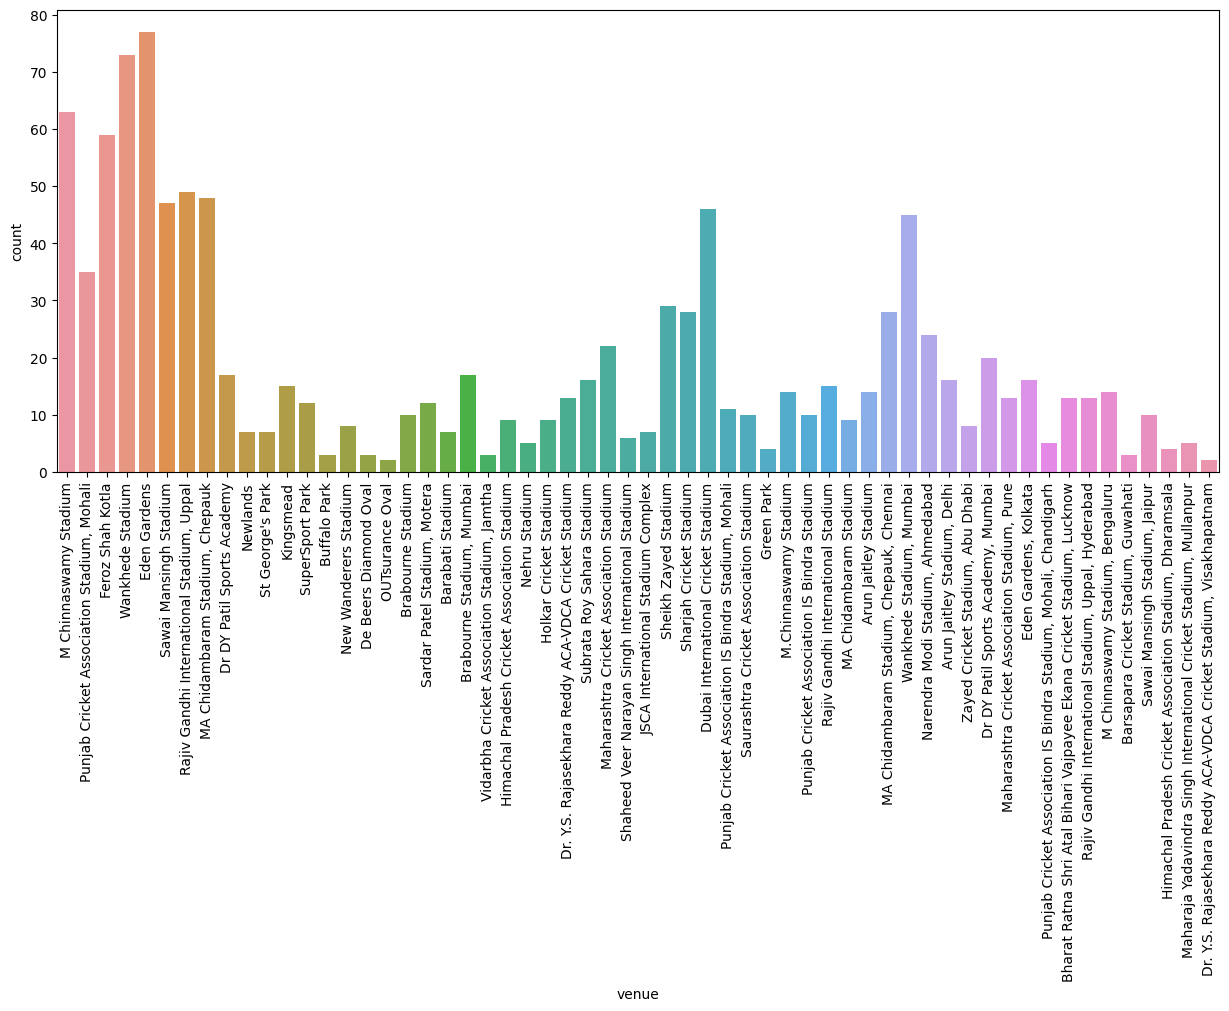

In [143]:
def venue():
    plt.figure(figsize=(15,6))
    sns.countplot(x=df2["venue"])
    plt.xticks(rotation=90)
venue()

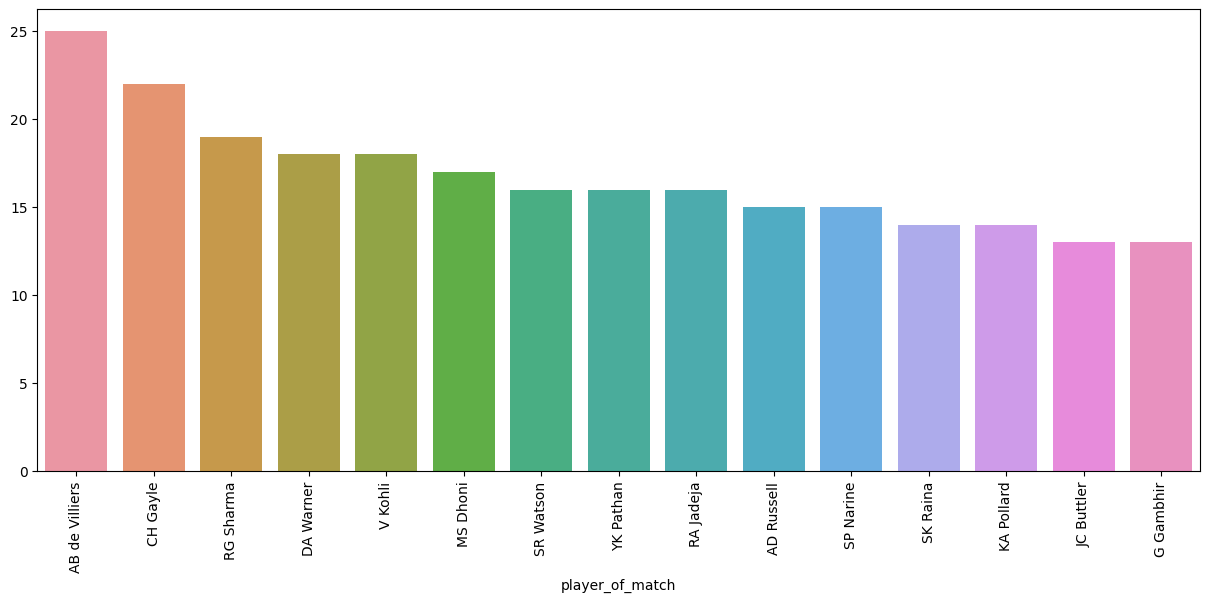

In [144]:
def most_10_player_match():
    j=df2["player_of_match"].value_counts().head(15)
    plt.figure(figsize=(15,6))
    sns.barplot(x=j.index,y=j.values)
    plt.xticks(rotation=90)
most_10_player_match()

In [145]:
teams_wins=df2["winner"].value_counts()
team_matches=df2["team1"].value_counts()+df2["team2"].value_counts()

In [146]:
win_per=round((teams_wins/team_matches)*100,2)

In [147]:
win_per

CSK     58.23
DC      46.00
GL      43.33
GT      62.22
KKR     52.19
KTK     42.86
KXIP    45.53
LSG     55.81
MI      55.17
PW      26.67
RCB     48.81
RPS     50.00
RR      51.14
SRH     45.53
Name: count, dtype: float64

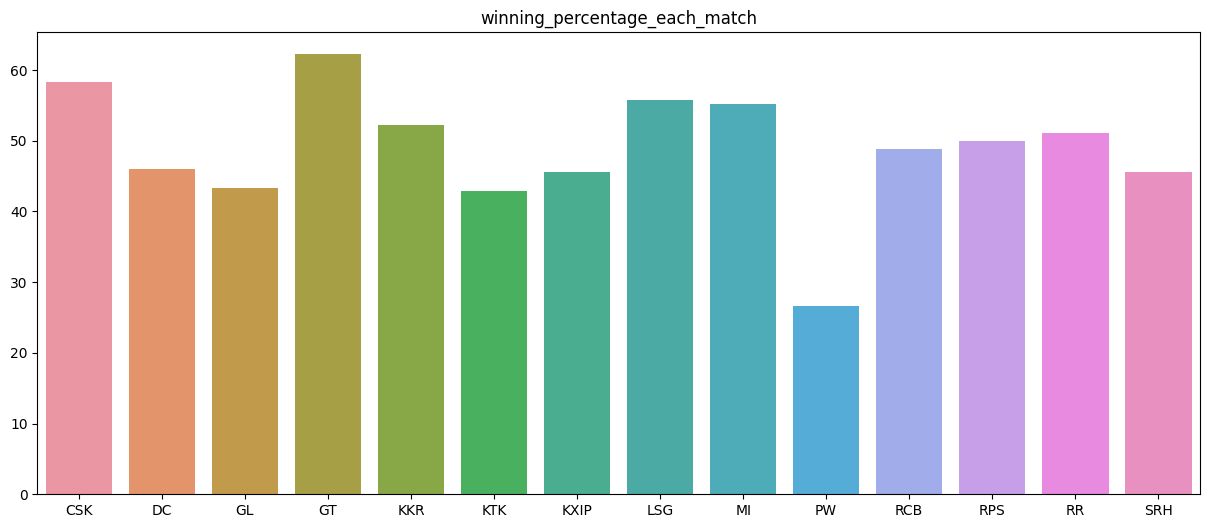

In [148]:
def winning_per_each_match():
    plt.figure(figsize=(15,6))
    sns.barplot(x=win_per.index,y=win_per.values)
    plt.title("winning_percentage_each_match")
winning_per_each_match()
    

In [149]:
dtypes2()

season                      int64
city                       object
date               datetime64[ns]
match_type                 object
player_of_match            object
venue                      object
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
target_runs               float64
target_overs              float64
super_over                 object
umpire1                    object
umpire2                    object
chasing                    object
dtype: object


**data preparation**

In [150]:
def data_preparation1():
    categorical=df2.select_dtypes(include="object")
    categorical_columns=categorical.columns
    preprocess_model=OrdinalEncoder()
    df2[categorical_columns]=preprocess_model.fit_transform(df2[categorical_columns])
data_preparation1()

In [151]:
def remove_time_stamp():
    df2.drop("date",axis=1,inplace=True)
remove_time_stamp()

In [152]:
def data_preparation():
    X=df2.drop("winner",axis=1)
    y=df2["winner"]
    return X,y
X,y=data_preparation()

In [153]:
def features_scores():
    global l
    feature_scores_model=ExtraTreesClassifier()
    feature_scores_model.fit(X,y)
    l=feature_scores_model.feature_importances_
features_scores()

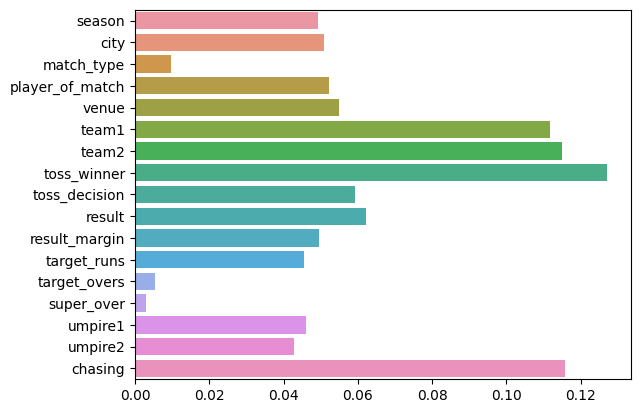

In [154]:
sns.barplot(x=l,y=X.columns)
plt.show()

In [155]:
def select_best_features():
    global X,y,scores,important_columns,X_new
    feature_scores_model=SelectKBest(score_func=chi2,k=10)
    feature_scores_model.fit(X,y)
    X_new=feature_scores_model.transform(X)
    scores=feature_scores_model.scores_
    important_columns = X.columns[feature_scores_model.get_support()]
    return X
X=select_best_features()

In [156]:
print(important_columns)
print()
print(scores)
print()
print(X_new)


Index(['city', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'result_margin', 'target_runs', 'umpire2', 'chasing'],
      dtype='object')

[1.41797439e+00 3.58922170e+02 1.82275731e-01 2.27248081e+03
 7.27230438e+02 6.72643687e+02 5.46124761e+02 6.86895579e+02
 1.15316950e+01 2.04365181e+01 4.57448933e+02 2.02961747e+02
 1.80735740e+00 7.08457052e+00 1.14658588e+02 2.52255752e+02
 5.43820675e+02]

[[  2.  37.  23. ... 223.  41.   4.]
 [  7. 149.  40. ... 241.  52.   6.]
 [ 10. 150.  16. ... 130.  15.   1.]
 ...
 [  1. 199.  32. ... 173.  31.  10.]
 [  8. 258.  28. ... 176.  59.  13.]
 [  8. 145.  28. ... 114.  36.   4.]]


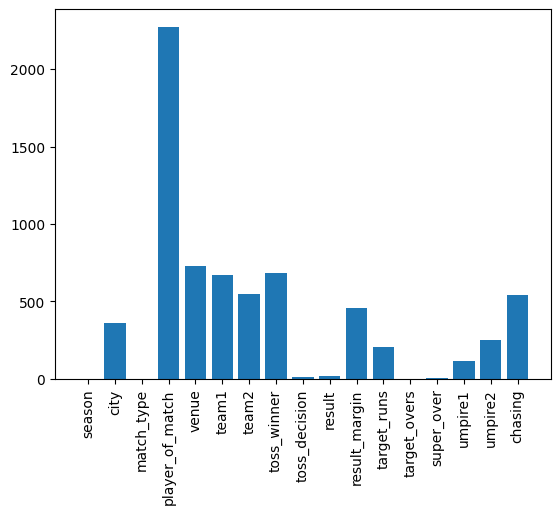

In [157]:
def scoresplot():
    plt.bar(x=X.columns,height=scores)
    plt.xticks(rotation=90)
    plt.show()
scoresplot()

**relation between independent features and dependent features**

In [158]:
def relation():
    print(df2.corr()["winner"])
relation()

season            -0.026713
city               0.006710
match_type        -0.015149
player_of_match   -0.067445
venue              0.154934
team1              0.453080
team2              0.415403
toss_winner        0.454765
toss_decision      0.029566
winner             1.000000
result            -0.024069
result_margin     -0.009997
target_runs       -0.022363
target_overs      -0.000851
super_over         0.011618
umpire1            0.045275
umpire2           -0.013315
chasing            0.413342
Name: winner, dtype: float64


**plotting the relationship between independent features and dependent features**

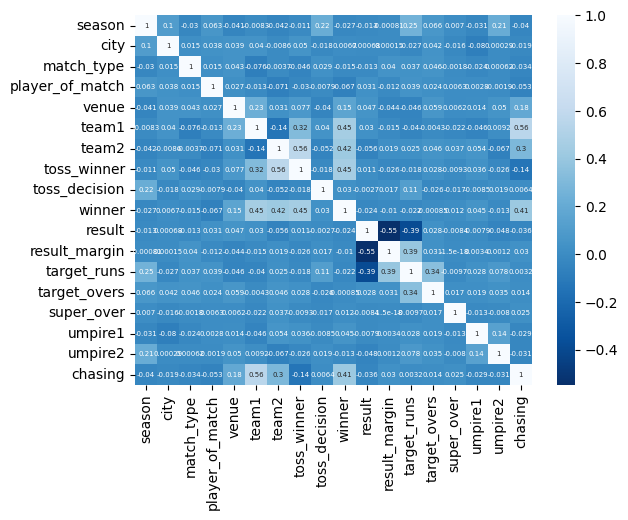

In [159]:
def relation():
    sns.heatmap(df2.corr(),cmap="Blues_r",annot=True,annot_kws={'size':5})
    plt.show()
relation()

**splitting the data**

In [160]:
def split1():
    global X_train,X_test,y_train,y_test
    X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0)
split1()
    

In [161]:
def model_select():
    global model_name,model_scores
    model=[]
    model.append(["DecisionTreeClassifier",DecisionTreeClassifier()])
    model.append(["RandomForestClassifier",RandomForestClassifier()])
    model.append(["KNeighborsClassifier",KNeighborsClassifier()])
    model.append(["LogisticRegression",LogisticRegression(solver = 'lbfgs', max_iter = 3000)])
    model.append(["SVC",SVC()])
    model.append(["GaussianNB",GaussianNB()])
    model.append(["BernouliNB",BernoulliNB()])
    model.append(["XGBClassifier",XGBClassifier()])
    model.append(["DUMMY",DummyClassifier()])
    model.append(["Tree",ExtraTreesClassifier()])
    model.append(["SGDC",SGDClassifier()])
    model.append(["Mlp",MLPClassifier()])
    model.append(["tree",ExtraTreeClassifier()])
    model_name=[]
    model_scores=[]
    for i,j in model:
        print("model name is:",i)
        model_name.append(i)
        scores=cross_val_score(j,X_train,y_train,cv=5)
        print("model_scores is:",scores)
        print("model_scores mean is:",scores.mean())
        model_scores.append(scores.mean())
        print()
model_select()


model name is: DecisionTreeClassifier
model_scores is: [0.40243902 0.43292683 0.42331288 0.44785276 0.41717791]
model_scores mean is: 0.4247418823881491

model name is: RandomForestClassifier
model_scores is: [0.55487805 0.49390244 0.51533742 0.53374233 0.55828221]
model_scores mean is: 0.5312284901990124

model name is: KNeighborsClassifier
model_scores is: [0.23170732 0.14634146 0.12883436 0.17791411 0.20858896]
model_scores mean is: 0.17867724076013766

model name is: LogisticRegression
model_scores is: [0.22560976 0.17682927 0.24539877 0.24539877 0.25153374]
model_scores mean is: 0.22895406254676046

model name is: SVC
model_scores is: [0.18292683 0.19512195 0.20858896 0.2392638  0.23312883]
model_scores mean is: 0.21180607511596589

model name is: GaussianNB
model_scores is: [0.29268293 0.21341463 0.33128834 0.29447853 0.25153374]
model_scores mean is: 0.2766796348945085

model name is: BernouliNB
model_scores is: [0.25609756 0.23780488 0.22699387 0.25153374 0.2208589 ]
model_scor

In [162]:
def final1():
    final=pd.DataFrame({"model":model_name,"scores":model_scores})
    return final
final1=final1()

In [163]:
final1

model    scores
0   DecisionTreeClassifier  0.424742
1   RandomForestClassifier  0.531228
2     KNeighborsClassifier  0.178677
3       LogisticRegression  0.228954
4                      SVC  0.211806
5               GaussianNB  0.276680
6               BernouliNB  0.238658
7            XGBClassifier  0.652454
8                    DUMMY  0.145653
9                     Tree  0.512861
10                    SGDC  0.157848
11                     Mlp  0.199521
12                    tree  0.406479

In [164]:
X_new

array([[  2.,  37.,  23., ..., 223.,  41.,   4.],
       [  7., 149.,  40., ..., 241.,  52.,   6.],
       [ 10., 150.,  16., ..., 130.,  15.,   1.],
       ...,
       [  1., 199.,  32., ..., 173.,  31.,  10.],
       [  8., 258.,  28., ..., 176.,  59.,  13.],
       [  8., 145.,  28., ..., 114.,  36.,   4.]])

**lets increase the model performance(accuracy)**

In [165]:
from sklearn.preprocessing import MinMaxScaler
def standalize():
    scaling=MinMaxScaler()
    X=scaling.fit_transform(X_new)
    return X
X=standalize()

In [166]:
def split2():
    global X_train,X_test,y_train,y_test
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
split2()

In [167]:
def model_select():
    global model_name,model_scores
    model=[]
    model.append(["DecisionTreeClassifier",DecisionTreeClassifier()])
    model.append(["RandomForestClassifier",RandomForestClassifier()])
    model.append(["KNeighborsClassifier",KNeighborsClassifier()])
    model.append(["LogisticRegression",LogisticRegression(solver = 'lbfgs', max_iter = 3000)])
    model.append(["SVC",SVC()])
    model.append(["GaussianNB",GaussianNB()])
    model.append(["BernouliNB",BernoulliNB()])
    model.append(["XGBClassifier",XGBClassifier()])
    model.append(["DUMMY",DummyClassifier()])
    model.append(["Tree",ExtraTreesClassifier()])
    model.append(["SGDC",SGDClassifier()])
    model.append(["Mlp",MLPClassifier()])
    model.append(["tree",ExtraTreeClassifier()])
    model_name=[]
    model_scores=[]
    for i,j in model:
        print("model name is:",i)
        model_name.append(i)
        scores=cross_val_score(j,X_train,y_train,cv=5)
        print("model_scores is:",scores)
        print("model_scores mean is:",scores.mean())
        model_scores.append(scores.mean())
        print()
model_select()


model name is: DecisionTreeClassifier
model_scores is: [0.41463415 0.40853659 0.39877301 0.45398773 0.39263804]
model_scores mean is: 0.4137139009426904

model name is: RandomForestClassifier
model_scores is: [0.55487805 0.51219512 0.51533742 0.49079755 0.56441718]
model_scores mean is: 0.5275250635941942

model name is: KNeighborsClassifier
model_scores is: [0.29268293 0.2195122  0.29447853 0.27607362 0.3190184 ]
model_scores mean is: 0.28035313481969176

model name is: LogisticRegression
model_scores is: [0.23780488 0.18902439 0.2392638  0.2392638  0.26380368]
model_scores mean is: 0.23383211132724827

model name is: SVC
model_scores is: [0.36585366 0.30487805 0.31288344 0.36196319 0.3190184 ]
model_scores mean is: 0.33291934759838393

model name is: GaussianNB
model_scores is: [0.29268293 0.21341463 0.33128834 0.29447853 0.25153374]
model_scores mean is: 0.2766796348945085

model name is: BernouliNB
model_scores is: [0.25609756 0.23780488 0.22699387 0.25153374 0.2208589 ]
model_scor

In [168]:
def final2():
    final=pd.DataFrame({"model":model_name,"scores":model_scores})
    return final
final2=final2()

In [169]:
final2

model    scores
0   DecisionTreeClassifier  0.413714
1   RandomForestClassifier  0.527525
2     KNeighborsClassifier  0.280353
3       LogisticRegression  0.233832
4                      SVC  0.332919
5               GaussianNB  0.276680
6               BernouliNB  0.238658
7            XGBClassifier  0.652454
8                    DUMMY  0.145653
9                     Tree  0.498130
10                    SGDC  0.183578
11                     Mlp  0.296267
12                    tree  0.391710

**best model apply hyperparameter tuning**

In [170]:
def hypertunning():
    global results
    model=XGBClassifier()
    d={"n_estimators":[1.0,10,20,30,40,50,60,100,200,500]}
    results=GridSearchCV(model,param_grid=d,cv=5)
    results.fit(X_train,y_train)
hypertunning()

In [171]:
def best_params():
    print(results.best_params_)
best_params()

{'n_estimators': 100}


**model creating**

In [172]:
def model():
    model=XGBClassifier(n_estimators=100)
    return model
model=model()

**model training**

In [173]:
def training():
    model.fit(X_train,y_train)
training()

**model known data score**

In [174]:
def training_score():
    print(model.score(X_train,y_train))
training_score()

1.0


**model unknown data score**

In [175]:
def testing_score():
    print(model.score(X_test,y_test))
testing_score()

0.6373626373626373


**prediction**

In [176]:
def predict():
    predict=model.predict(X_test)
    return predict
y_pred=predict()

In [177]:
y_pred

array([ 4,  6,  1,  4,  4, 12,  0,  4, 12,  6, 13,  4,  8,  0, 12,  4,  6,
       10,  0,  4,  6,  0,  1,  1,  8,  8, 10, 10, 10,  4, 12,  0,  3,  1,
        8,  8, 13, 13, 10, 11, 13,  8, 12,  4, 13, 12, 10,  8,  6,  0, 13,
       10, 10,  0,  6,  3, 12,  4, 12,  0,  1,  0,  0,  1, 13, 12,  4, 12,
       13,  4, 10, 10, 10,  8,  8, 12,  0,  1, 10, 12, 13, 13, 12, 12,  0,
       13,  3, 10, 12,  0, 12,  8,  3,  0,  3, 12,  4, 10,  8,  0, 12,  4,
       12, 12,  1,  4,  4, 12,  1,  3,  4,  2,  1,  6, 13,  1, 13, 12, 10,
        6,  4,  1,  0,  1,  6, 13, 10, 10, 10,  4, 10, 10,  0,  8,  4,  0,
       12,  4,  0, 12, 10, 10,  6,  6,  0,  6, 10,  0,  1, 13, 10,  4,  7,
        0, 12,  4,  4, 13,  8, 10,  0,  8, 12,  8,  4,  1, 12,  0,  4,  0,
        4, 13, 12,  8,  3, 10,  7,  1,  1,  6,  1,  6, 13,  0,  0,  0,  4,
        4,  1,  6,  7, 10,  6,  1,  8,  7,  3,  0, 10,  8, 12,  8,  8, 10,
       13,  1,  3, 10,  8, 10,  0,  0,  1, 10,  1,  6,  4, 10, 10,  1,  4,
        8,  8, 13, 10, 12

In [178]:
def report():
    print(classification_report(y_test,y_pred))
report()

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        41
         1.0       0.69      0.61      0.65        33
         2.0       1.00      0.50      0.67         2
         3.0       0.60      0.50      0.55        12
         4.0       0.66      0.77      0.71        30
         5.0       0.00      0.00      0.00         2
         6.0       0.42      0.37      0.39        27
         7.0       0.50      0.40      0.44         5
         8.0       0.57      0.64      0.60        25
         9.0       0.00      0.00      0.00         3
        10.0       0.85      0.77      0.80        43
        11.0       0.00      0.00      0.00         4
        12.0       0.56      0.74      0.63        27
        13.0       0.46      0.63      0.53        19

    accuracy                           0.64       273
   macro avg       0.51      0.48      0.48       273
weighted avg       0.63      0.64      0.63       273



In [179]:
def final_dataframe():
    df=pd.DataFrame({"actual":y_test,"predicted":y_pred})
    return df
df=final_dataframe()

In [180]:
df

actual  predicted
548     4.0          4
224     9.0          6
817     1.0          1
296     4.0          4
489    10.0          4
..      ...        ...
190     1.0          1
832     6.0          8
145    10.0         10
670     0.0          0
256     8.0         13

[273 rows x 2 columns]

In [181]:
df.to_csv("ipl.csv")